In [205]:
import requests
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import noisereduce as nr  # Noise reduction library
import soundfile as sf    # For saving the noise-reduced audio files
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Define the API endpoint and query
base_url = "https://www.xeno-canto.org/api/2/recordings"
birds = ["penguin", "Red-tailed Hawk", "Greater Prairie Chicken", "Magpie Goose"]


In [206]:
# Dictionary to store DataFrames for each bird
df_birds = {}

Getting the data from the xeno API of the different birds. Divided by the 5 species by area of coding so we could run seperately the different bird familys. There are still some problems with the birds family of pigeons and red hawk since ther sounds are of different species of pigeons and hawks

In [207]:
query = birds[0]  # Search for the current bird
url = f"{base_url}?query={query}"

# Initialize variables
recordings = []
page = 1

# Fetch data until we have at least 30 recordings
while len(recordings) < 30:
    # Fetch data from the API with pagination
    response = requests.get(f"{url}&page={page}")
    if response.status_code == 200:
        data = response.json()
        # Append recordings to the list
        recordings.extend(data.get("recordings", []))
        # If there are no more recordings, stop
        if len(data.get("recordings", [])) == 0:
            break
        page += 1
    else:
        print(f"Error: Unable to fetch data for {birds[0]}. Status code {response.status_code}")
        break

# Limit the list to 20 recordings
recordings = recordings[:30]

# Create a DataFrame for the current bird and store it in the dictionary
df_birds[birds[0]] = pd.DataFrame(recordings)

# Display the DataFrame for the current bird
if not df_birds[birds[0]].empty:
    print(f"Data for {birds[0]}:")
    print(df_birds[birds[0]][["gen", "sp", "en", "loc", "file"]])
else:
    print(f"No data found for {birds[0]}.")

Data for penguin:
            gen           sp            en  \
0   Aptenodytes  patagonicus  King Penguin   
1   Aptenodytes  patagonicus  King Penguin   
2   Aptenodytes  patagonicus  King Penguin   
3   Aptenodytes  patagonicus  King Penguin   
4   Aptenodytes  patagonicus  King Penguin   
5   Aptenodytes  patagonicus  King Penguin   
6   Aptenodytes  patagonicus  King Penguin   
7   Aptenodytes  patagonicus  King Penguin   
8   Aptenodytes  patagonicus  King Penguin   
9   Aptenodytes  patagonicus  King Penguin   
10  Aptenodytes  patagonicus  King Penguin   
11  Aptenodytes  patagonicus  King Penguin   
12  Aptenodytes  patagonicus  King Penguin   
13  Aptenodytes  patagonicus  King Penguin   
14  Aptenodytes  patagonicus  King Penguin   
15  Aptenodytes  patagonicus  King Penguin   
16  Aptenodytes  patagonicus  King Penguin   
17  Aptenodytes  patagonicus  King Penguin   
18  Aptenodytes  patagonicus  King Penguin   
19  Aptenodytes  patagonicus  King Penguin   
20  Aptenodytes 

In [208]:
query = birds[1]  # Search for the current bird
url = f"{base_url}?query={query}"

# Initialize variables
recordings = []
page = 1

# Fetch data until we have at least 20 recordings
while len(recordings) < 30:
    # Fetch data from the API with pagination
    response = requests.get(f"{url}&page={page}")
    if response.status_code == 200:
        data = response.json()
        # Append recordings to the list
        recordings.extend(data.get("recordings", []))
        # If there are no more recordings, stop
        if len(data.get("recordings", [])) == 0:
            break
        page += 1
    else:
        print(f"Error: Unable to fetch data for {birds[1]}. Status code {response.status_code}")
        break

# Limit the list to 20 recordings
recordings = recordings[:30]

# Create a DataFrame for the current bird and store it in the dictionary
df_birds[birds[1]] = pd.DataFrame(recordings)

# Display the DataFrame for the current bird
if not df_birds[birds[1]].empty:
    print(f"Data for {birds[1]}:")
    print(df_birds[birds[1]][["gen", "sp", "en", "loc", "file"]])
else:
    print(f"No data found for {birds[1]}.")

Data for Red-tailed Hawk:
      gen           sp               en  \
0   Buteo  jamaicensis  Red-tailed Hawk   
1   Buteo  jamaicensis  Red-tailed Hawk   
2   Buteo  jamaicensis  Red-tailed Hawk   
3   Buteo  jamaicensis  Red-tailed Hawk   
4   Buteo  jamaicensis  Red-tailed Hawk   
5   Buteo  jamaicensis  Red-tailed Hawk   
6   Buteo  jamaicensis  Red-tailed Hawk   
7   Buteo  jamaicensis  Red-tailed Hawk   
8   Buteo  jamaicensis  Red-tailed Hawk   
9   Buteo  jamaicensis  Red-tailed Hawk   
10  Buteo  jamaicensis  Red-tailed Hawk   
11  Buteo  jamaicensis  Red-tailed Hawk   
12  Buteo  jamaicensis  Red-tailed Hawk   
13  Buteo  jamaicensis  Red-tailed Hawk   
14  Buteo  jamaicensis  Red-tailed Hawk   
15  Buteo  jamaicensis  Red-tailed Hawk   
16  Buteo  jamaicensis  Red-tailed Hawk   
17  Buteo  jamaicensis  Red-tailed Hawk   
18  Buteo  jamaicensis  Red-tailed Hawk   
19  Buteo  jamaicensis  Red-tailed Hawk   
20  Buteo  jamaicensis  Red-tailed Hawk   
21  Buteo  jamaicensis  Red-

In [209]:
query = birds[2]  # Search for the current bird
url = f"{base_url}?query={query}"

# Initialize variables
recordings = []
page = 1

# Fetch data until we have at least 20 recordings
while len(recordings) < 30:
    # Fetch data from the API with pagination
    response = requests.get(f"{url}&page={page}")
    if response.status_code == 200:
        data = response.json()
        # Append recordings to the list
        recordings.extend(data.get("recordings", []))
        # If there are no more recordings, stop
        if len(data.get("recordings", [])) == 0:
            break
        page += 1
    else:
        print(f"Error: Unable to fetch data for {birds[2]}. Status code {response.status_code}")
        break

# Limit the list to 20 recordings
recordings = recordings[:30]

# Create a DataFrame for the current bird and store it in the dictionary
df_birds[birds[2]] = pd.DataFrame(recordings)

# Display the DataFrame for the current bird
if not df_birds[birds[2]].empty:
    print(f"Data for {birds[2]}:")
    print(df_birds[birds[2]][["gen", "sp", "en", "loc", "file"]])
else:
    print(f"No data found for {birds[2]}.")

Data for Greater Prairie Chicken:
            gen      sp                       en  \
0   Tympanuchus  cupido  Greater Prairie Chicken   
1   Tympanuchus  cupido  Greater Prairie Chicken   
2   Tympanuchus  cupido  Greater Prairie Chicken   
3   Tympanuchus  cupido  Greater Prairie Chicken   
4   Tympanuchus  cupido  Greater Prairie Chicken   
5   Tympanuchus  cupido  Greater Prairie Chicken   
6   Tympanuchus  cupido  Greater Prairie Chicken   
7   Tympanuchus  cupido  Greater Prairie Chicken   
8   Tympanuchus  cupido  Greater Prairie Chicken   
9   Tympanuchus  cupido  Greater Prairie Chicken   
10  Tympanuchus  cupido  Greater Prairie Chicken   
11  Tympanuchus  cupido  Greater Prairie Chicken   
12  Tympanuchus  cupido  Greater Prairie Chicken   
13  Tympanuchus  cupido  Greater Prairie Chicken   
14  Tympanuchus  cupido  Greater Prairie Chicken   
15  Tympanuchus  cupido  Greater Prairie Chicken   
16  Tympanuchus  cupido  Greater Prairie Chicken   
17  Tympanuchus  cupido  Great

In [210]:
query = birds[3]  # Search for the current bird
url = f"{base_url}?query={query}"

# Initialize variables
recordings = []
page = 1

# Fetch data until we have at least 20 recordings
while len(recordings) < 30:
    # Fetch data from the API with pagination
    response = requests.get(f"{url}&page={page}")
    if response.status_code == 200:
        data = response.json()
        # Append recordings to the list
        recordings.extend(data.get("recordings", []))
        # If there are no more recordings, stop
        if len(data.get("recordings", [])) == 0:
            break
        page += 1
    else:
        print(f"Error: Unable to fetch data for {birds[3]}. Status code {response.status_code}")
        break

# Limit the list to 20 recordings
recordings = recordings[:30]

# Create a DataFrame for the current bird and store it in the dictionary
df_birds[birds[3]] = pd.DataFrame(recordings)

# Display the DataFrame for the current bird
if not df_birds[birds[3]].empty:
    print(f"Data for {birds[3]}:")
    print(df_birds[birds[3]][["gen", "sp", "en", "loc", "file"]])
else:
    print(f"No data found for {birds[3]}.")

Error: Unable to fetch data for Magpie Goose. Status code 400
Data for Magpie Goose:
          gen           sp            en  \
0   Anseranas  semipalmata  Magpie Goose   
1   Anseranas  semipalmata  Magpie Goose   
2   Anseranas  semipalmata  Magpie Goose   
3   Anseranas  semipalmata  Magpie Goose   
4   Anseranas  semipalmata  Magpie Goose   
5   Anseranas  semipalmata  Magpie Goose   
6   Anseranas  semipalmata  Magpie Goose   
7   Anseranas  semipalmata  Magpie Goose   
8   Anseranas  semipalmata  Magpie Goose   
9   Anseranas  semipalmata  Magpie Goose   
10  Anseranas  semipalmata  Magpie Goose   
11  Anseranas  semipalmata  Magpie Goose   
12  Anseranas  semipalmata  Magpie Goose   
13  Anseranas  semipalmata  Magpie Goose   
14  Anseranas  semipalmata  Magpie Goose   
15  Anseranas  semipalmata  Magpie Goose   
16  Anseranas  semipalmata  Magpie Goose   
17  Anseranas  semipalmata  Magpie Goose   
18  Anseranas  semipalmata  Magpie Goose   
19  Anseranas  semipalmata  Magpie 

Creates the directories where we store the birds call without preprocessing it.

In [211]:
# Iterate through the bird dictionary
for bird, df in df_birds.items():
    # Skip if the DataFrame is empty
    if df.empty:
        print(f"No recordings found for {bird}.")
        continue
    
    # Create a folder for the bird
    folder_name = f"{bird}_sounds"
    os.makedirs(folder_name, exist_ok=True)  # Ensure the directory exists

    # Download each recording
    recordings = df.to_dict('records')  # Convert DataFrame to a list of dictionaries
    for i, recording in enumerate(recordings):
        audio_url = recording['file']  # Use the URL directly
        species = recording.get('en', "unknown_species")  # Handle missing English names
        file_name = f"{folder_name}/{species.replace(' ', '_')}_{i+1}.mp3"
        try:
            audio_response = requests.get(audio_url)
            if audio_response.status_code == 200:  # Ensure the response is valid
                with open(file_name, 'wb') as f:
                    f.write(audio_response.content)
                print(f"Downloaded: {file_name}")
            else:
                print(f"Failed to download {audio_url}: HTTP {audio_response.status_code}")
        except Exception as e:
            print(f"Failed to download {audio_url}: {e}")


Downloaded: penguin_sounds/King_Penguin_1.mp3
Downloaded: penguin_sounds/King_Penguin_2.mp3
Downloaded: penguin_sounds/King_Penguin_3.mp3
Downloaded: penguin_sounds/King_Penguin_4.mp3
Downloaded: penguin_sounds/King_Penguin_5.mp3
Downloaded: penguin_sounds/King_Penguin_6.mp3
Downloaded: penguin_sounds/King_Penguin_7.mp3
Downloaded: penguin_sounds/King_Penguin_8.mp3
Downloaded: penguin_sounds/King_Penguin_9.mp3
Downloaded: penguin_sounds/King_Penguin_10.mp3
Downloaded: penguin_sounds/King_Penguin_11.mp3
Downloaded: penguin_sounds/King_Penguin_12.mp3
Downloaded: penguin_sounds/King_Penguin_13.mp3
Downloaded: penguin_sounds/King_Penguin_14.mp3
Downloaded: penguin_sounds/King_Penguin_15.mp3
Downloaded: penguin_sounds/King_Penguin_16.mp3
Downloaded: penguin_sounds/King_Penguin_17.mp3
Downloaded: penguin_sounds/King_Penguin_18.mp3
Downloaded: penguin_sounds/King_Penguin_19.mp3
Downloaded: penguin_sounds/King_Penguin_20.mp3
Downloaded: penguin_sounds/King_Penguin_21.mp3
Downloaded: penguin_so

Aplying Noise reduction using an externate library

In [213]:
# Function to apply noise reduction to all .mp3 files in the given directories
def apply_noise_reduction(input_directories, output_base_dir):
    """
    Applies noise reduction to all .mp3 files in the input directories and saves them to output directories.
    
    Args:
    - input_directories (list): List of directories containing audio files.
    - output_base_dir (str): Directory to save noise-reduced audio files.
    """
    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)
    
    for input_dir in input_directories:
        # Define output directory for this input folder
        output_dir = os.path.join(output_base_dir, os.path.basename(input_dir) + "_noise_reduced")
        os.makedirs(output_dir, exist_ok=True)
        
        print(f"\nProcessing directory: {input_dir}")
        print(f"Saving noise-reduced files to: {output_dir}")

        # List all .mp3 files
        audio_files = [f for f in os.listdir(input_dir) if f.endswith(".mp3")]
        
        if not audio_files:
            print(f"No audio files found in {input_dir}.")
            continue

        # Process each audio file
        for audio_file in audio_files:
            input_path = os.path.join(input_dir, audio_file)
            output_path = os.path.join(output_dir, audio_file)

            try:
                # Load the audio file
                y, sr = librosa.load(input_path, sr=None)  # y: audio time series, sr: sampling rate

                # Noise reduction step
                print(f"Applying noise reduction to: {audio_file}")
                reduced_noise = nr.reduce_noise(y=y, sr=sr, prop_decrease=0.5)  # Reduce noise
                
                # Save the noise-reduced audio
                sf.write(output_path, reduced_noise, sr)
                print(f"Saved noise-reduced audio to: {output_path}")
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

# Input directories
directories = ["penguin_sounds", "Red-tailed Hawk_sounds", "Greater Prairie Chicken_sounds", "Magpie Goose_sounds"]

# Output base directory to save noise-reduced files
output_directory = "noise_reduced_sounds"

# Apply noise reduction
apply_noise_reduction(directories, output_directory)




Processing directory: penguin_sounds
Saving noise-reduced files to: noise_reduced_sounds\penguin_sounds_noise_reduced
Applying noise reduction to: King_Penguin_1.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Penguin_1.mp3
Applying noise reduction to: King_Penguin_10.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Penguin_10.mp3
Applying noise reduction to: King_Penguin_11.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Penguin_11.mp3
Applying noise reduction to: King_Penguin_12.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Penguin_12.mp3
Applying noise reduction to: King_Penguin_13.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Penguin_13.mp3
Applying noise reduction to: King_Penguin_14.mp3
Saved noise-reduced audio to: noise_reduced_sounds\penguin_sounds_noise_reduced\King_Peng

Here we have the identification of the temporal centroid and further segmentation of the sound file in 10 second segments. Currently the plot of every seingle sound file is shown and this needs to be reduced (cant show 80 plots of the same thing)


Processing directory: noise_reduced_sounds/penguin_sounds_noise_reduced
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_1_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_10_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_11_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_12_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_13_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_14_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_15_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_16_segment.wav
Extracted segment saved 

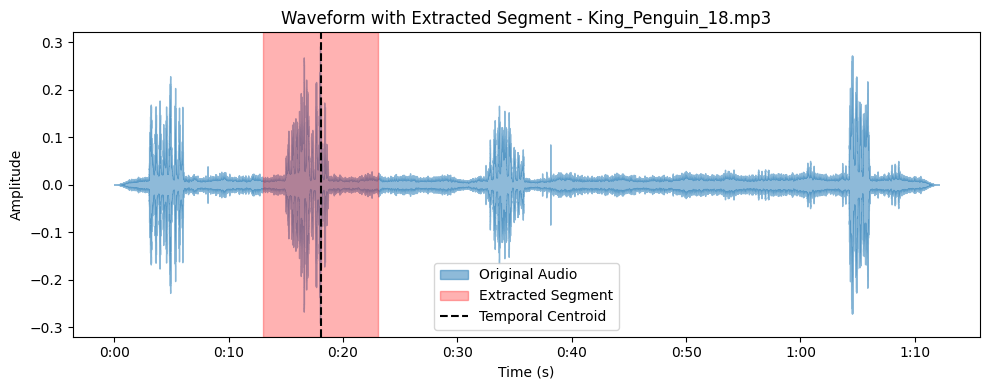

Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_19_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_2_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_20_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_21_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_22_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_23_segment.wav


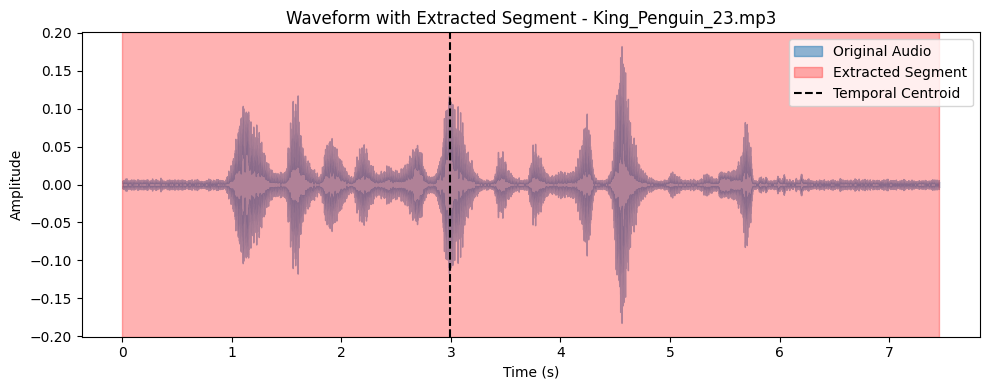

Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_24_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_25_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_26_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_27_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_28_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_29_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_3_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin_30_segment.wav
Extracted segment saved to: extracted_segments\penguin_sounds_noise_reduced_segments\King_Penguin

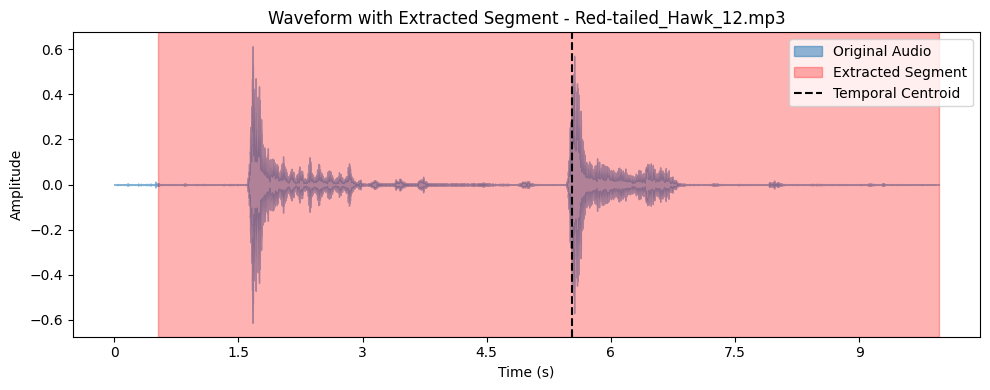

Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_13_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_14_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_15_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_16_segment.wav


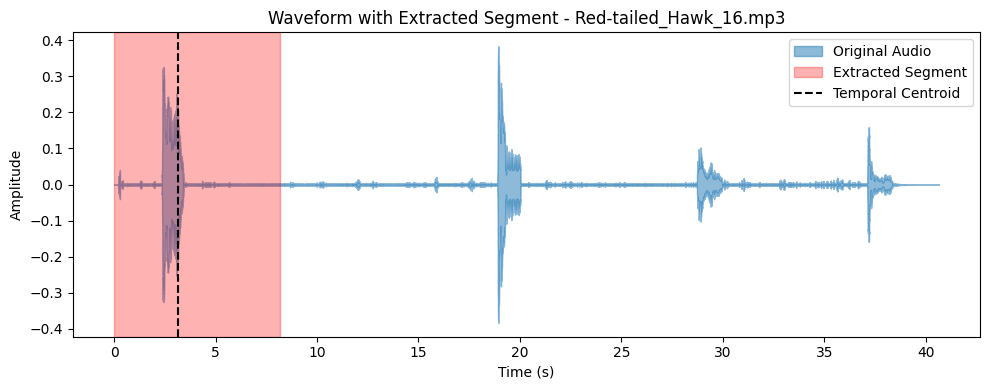

Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_17_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_18_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_19_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_2_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_21_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_22_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_23_segment.wav
Extracted segment saved to: extracted_segments\Red-tailed Hawk_sounds_noise_reduced_segments\Red-tailed_Hawk_24_segment.wav
Extracted

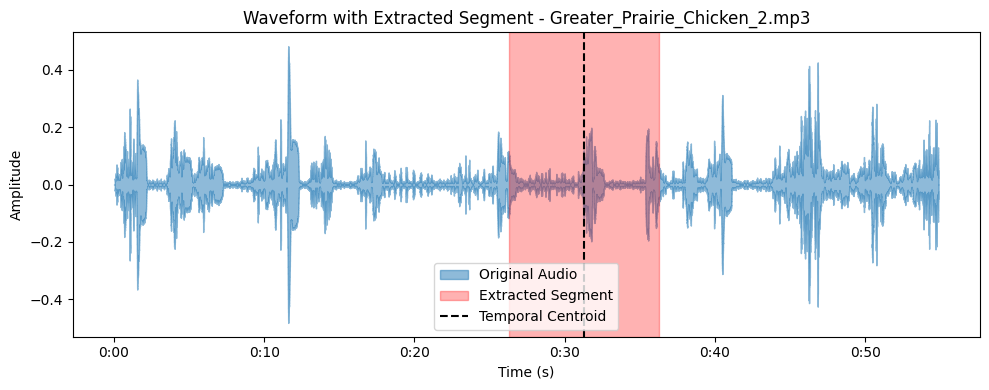

Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_20_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_21_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_22_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_23_segment.wav


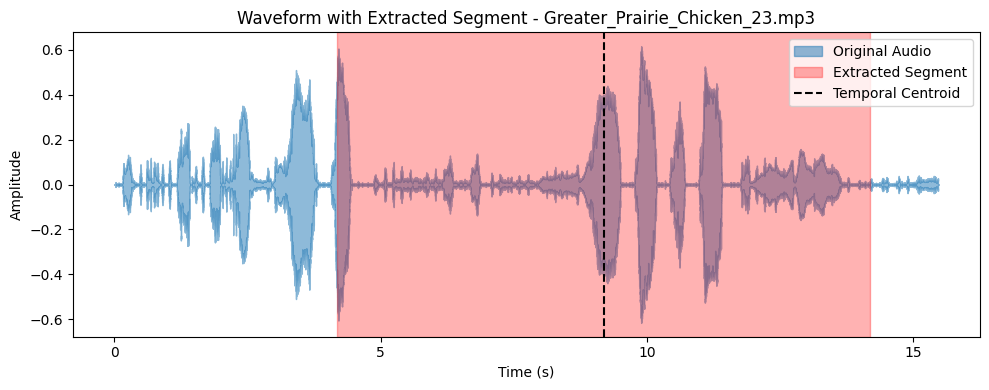

Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_24_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_25_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_26_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_27_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_28_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_3_segment.wav
Extracted segment saved to: extracted_segments\Greater Prairie Chicken_sounds_noise_reduced_segments\Greater_Prairie_Chicken_30_segment.wav
Extracted segment sav

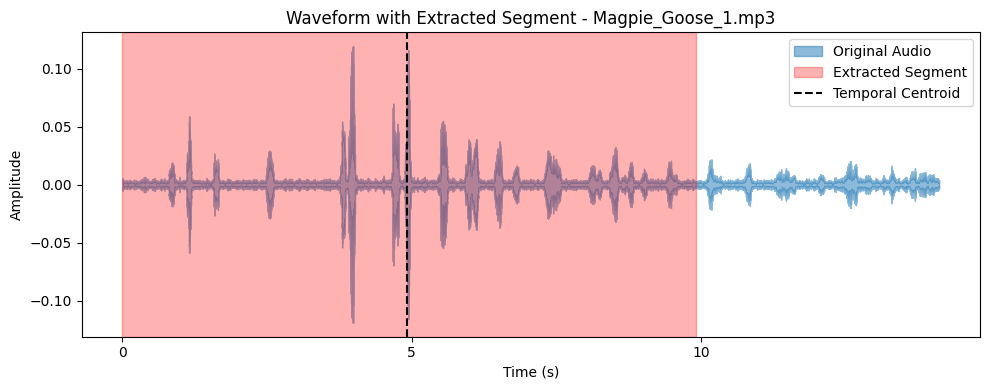

Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_10_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_11_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_12_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_13_segment.wav


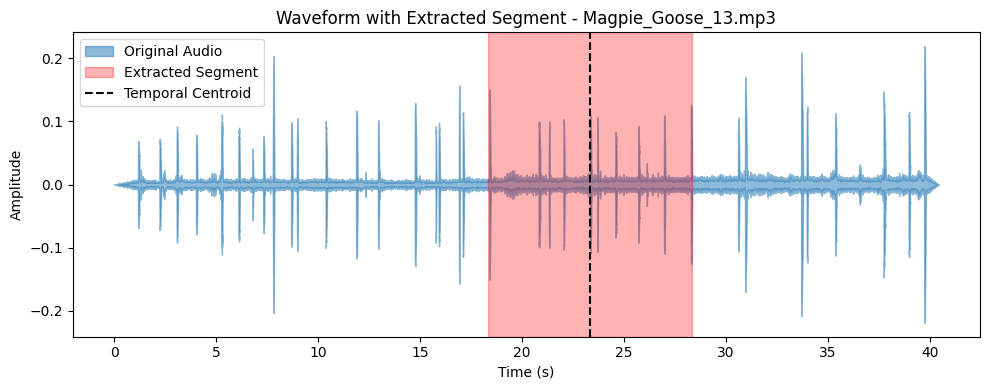

Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_14_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_15_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_16_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_17_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_18_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_19_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_2_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goose_sounds_noise_reduced_segments\Magpie_Goose_20_segment.wav
Extracted segment saved to: extracted_segments\Magpie Goo

In [285]:
# Function to extract segments around temporal centroids with user-specified plots
def extract_segments_around_temporal_centroid(
    input_directories, 
    output_directory, 
    segment_duration=5, 
    plot_files={}
):
    """
    Extracts segments from audio files around the temporal centroid, saves them, and plots specified files.

    Args:
    - input_directories (list): List of directories containing audio files.
    - output_directory (str): Directory to save the extracted segments.
    - segment_duration (int): Duration (in seconds) before and after the centroid to include in the segment.
    - plot_files (dict): Dictionary specifying files to plot for each species (keys are species names, values are lists of file names to plot).
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for input_dir in input_directories:
        print(f"\nProcessing directory: {input_dir}")

        # Create sub-directory for the extracted segments
        species_name = os.path.basename(input_dir)
        output_sub_dir = os.path.join(output_directory, species_name + "_segments")
        os.makedirs(output_sub_dir, exist_ok=True)

        # List all .mp3 files
        audio_files = [f for f in os.listdir(input_dir) if f.endswith(".mp3")]

        if not audio_files:
            print(f"No audio files found in {input_dir}.")
            continue

        for audio_file in audio_files:
            input_path = os.path.join(input_dir, audio_file)

            try:
                # Load the audio file
                y, sr = librosa.load(input_path, sr=None)

                # Compute energy envelope and cumulative energy (CDF of energy)
                energy_envelope = np.abs(y) ** 2
                cumulative_energy = np.cumsum(energy_envelope)
                cumulative_energy /= cumulative_energy[-1]  # Normalize to [0, 1]

                # Find the temporal centroid (cumulative energy ≈ 0.5)
                temporal_centroid_index = np.where(cumulative_energy >= 0.5)[0][0]
                temporal_centroid_time = temporal_centroid_index / sr

                # Calculate start and end times for the segment
                start_time = max(0, temporal_centroid_time - segment_duration)
                end_time = min(len(y) / sr, temporal_centroid_time + segment_duration)

                # Convert start and end times to sample indices
                start_sample = int(start_time * sr)
                end_sample = int(end_time * sr)

                # Extract the audio segment
                segment = y[start_sample:end_sample]

                # Save the extracted segment
                segment_output_path = os.path.join(output_sub_dir, f"{os.path.splitext(audio_file)[0]}_segment.wav")
                sf.write(segment_output_path, segment, sr)

                print(f"Extracted segment saved to: {segment_output_path}")

                # Plot if the file is in the user-specified list for this species
                if species_name in plot_files and audio_file in plot_files[species_name]:
                    plt.figure(figsize=(10, 4))
                    librosa.display.waveshow(y, sr=sr, alpha=0.5, label="Original Audio")
                    plt.axvspan(start_time, end_time, color='red', alpha=0.3, label="Extracted Segment")
                    plt.axvline(temporal_centroid_time, color='black', linestyle='--', label="Temporal Centroid")
                    plt.title(f"Waveform with Extracted Segment - {audio_file}")
                    plt.xlabel("Time (s)")
                    plt.ylabel("Amplitude")
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

# Input directories containing noise-reduced files
noise_reduced_directories = [
    "noise_reduced_sounds/penguin_sounds_noise_reduced",
    "noise_reduced_sounds/Red-tailed Hawk_sounds_noise_reduced",
    "noise_reduced_sounds/Greater Prairie Chicken_sounds_noise_reduced",
    "noise_reduced_sounds/Magpie Goose_sounds_noise_reduced"
]

# Output directory for extracted segments
output_segments_directory = "extracted_segments"

# Specify which files to plot for each species
files_to_plot = {
    "penguin_sounds_noise_reduced": ["King_Penguin_18.mp3", "King_Penguin_23.mp3"],
    "Red-tailed Hawk_sounds_noise_reduced": ["Red-tailed_Hawk_12.mp3", "Red-tailed_Hawk_16.mp3"],
    "Greater Prairie Chicken_sounds_noise_reduced": ["Greater_Prairie_Chicken_2.mp3", "Greater_Prairie_Chicken_23.mp3"],
    "Magpie Goose_sounds_noise_reduced": ["Magpie_Goose_1.mp3", "Magpie_Goose_13.mp3"]
}

# Extract segments around the temporal centroid and plot specified files
extract_segments_around_temporal_centroid(noise_reduced_directories, output_segments_directory, plot_files=files_to_plot)



# Graficos Transformada de fourier


Processing directory: extracted_segments/penguin_sounds_noise_reduced_segments
Visualizing segment for: King_Penguin_10_segment.wav


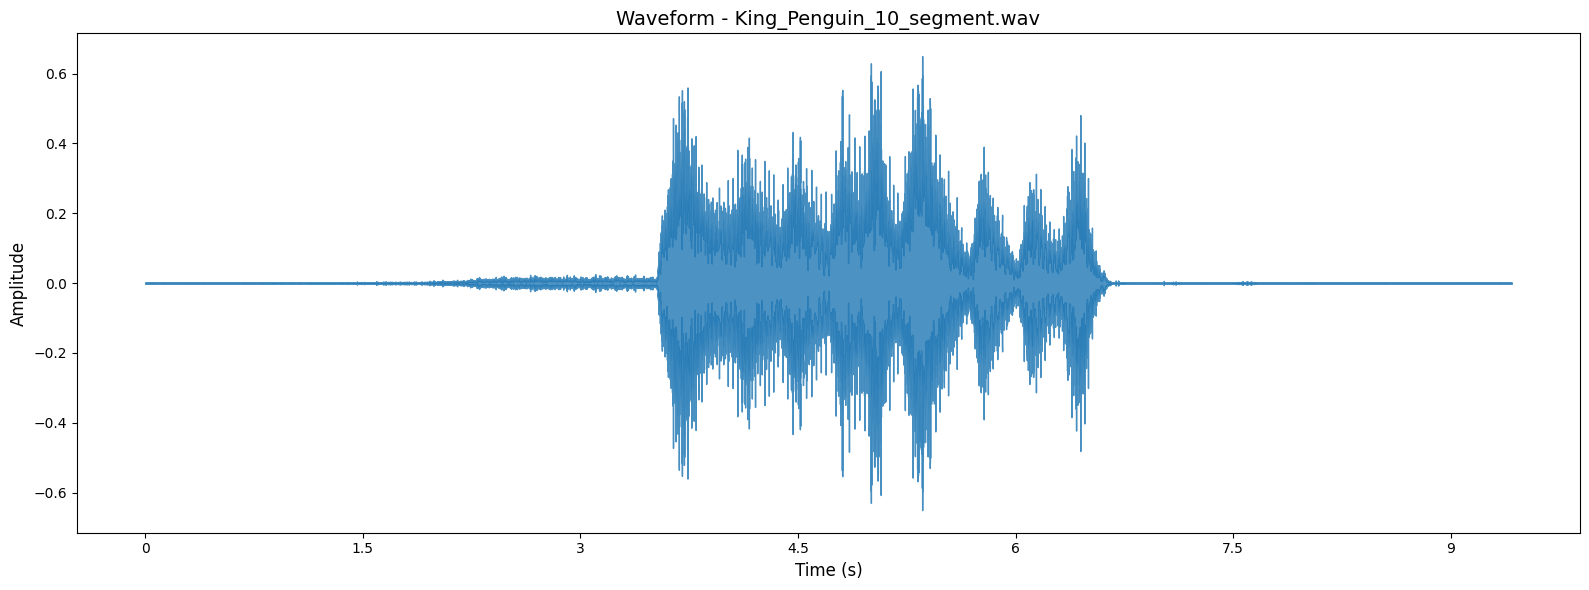

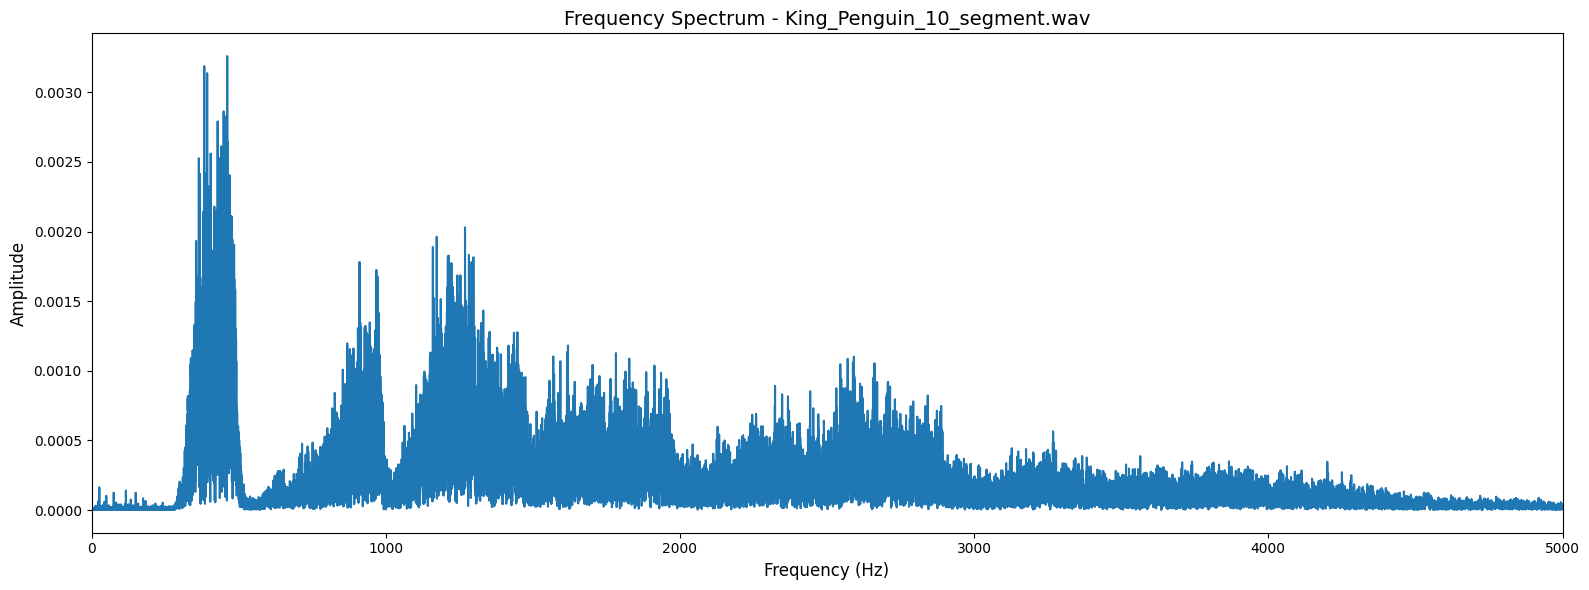

Visualizing segment for: King_Penguin_11_segment.wav


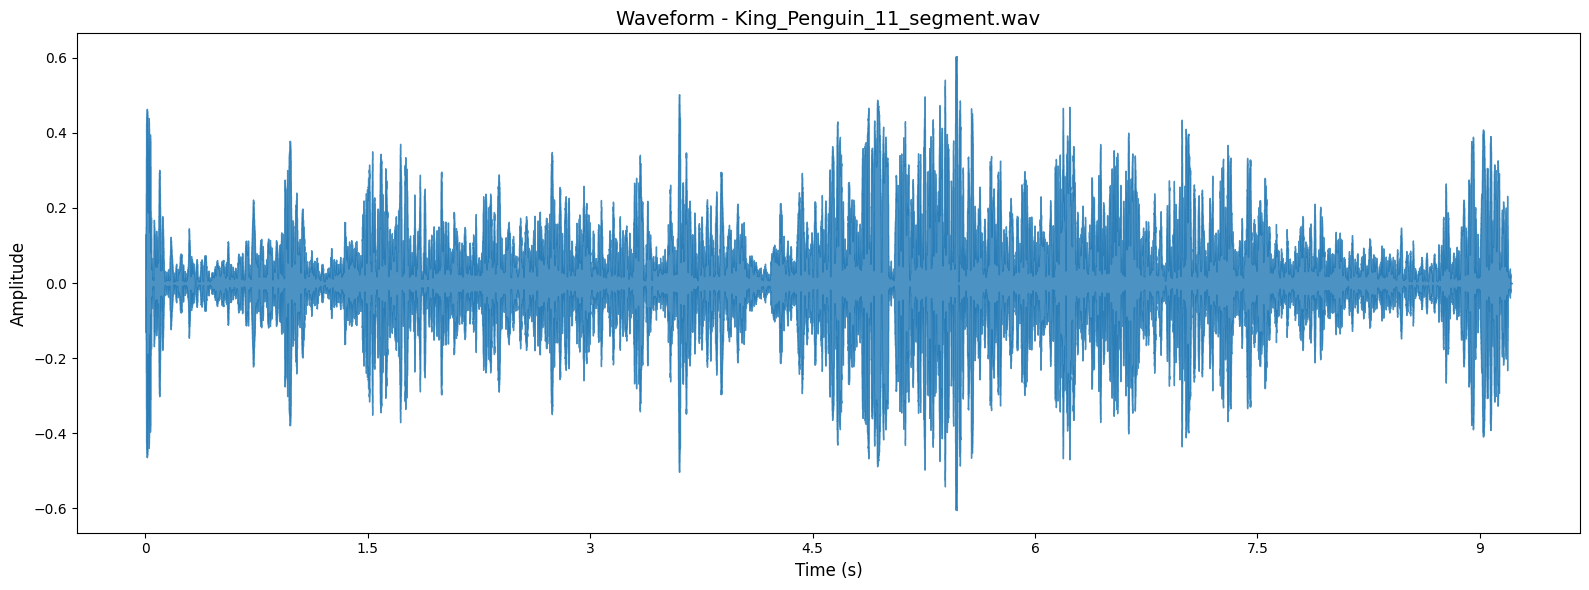

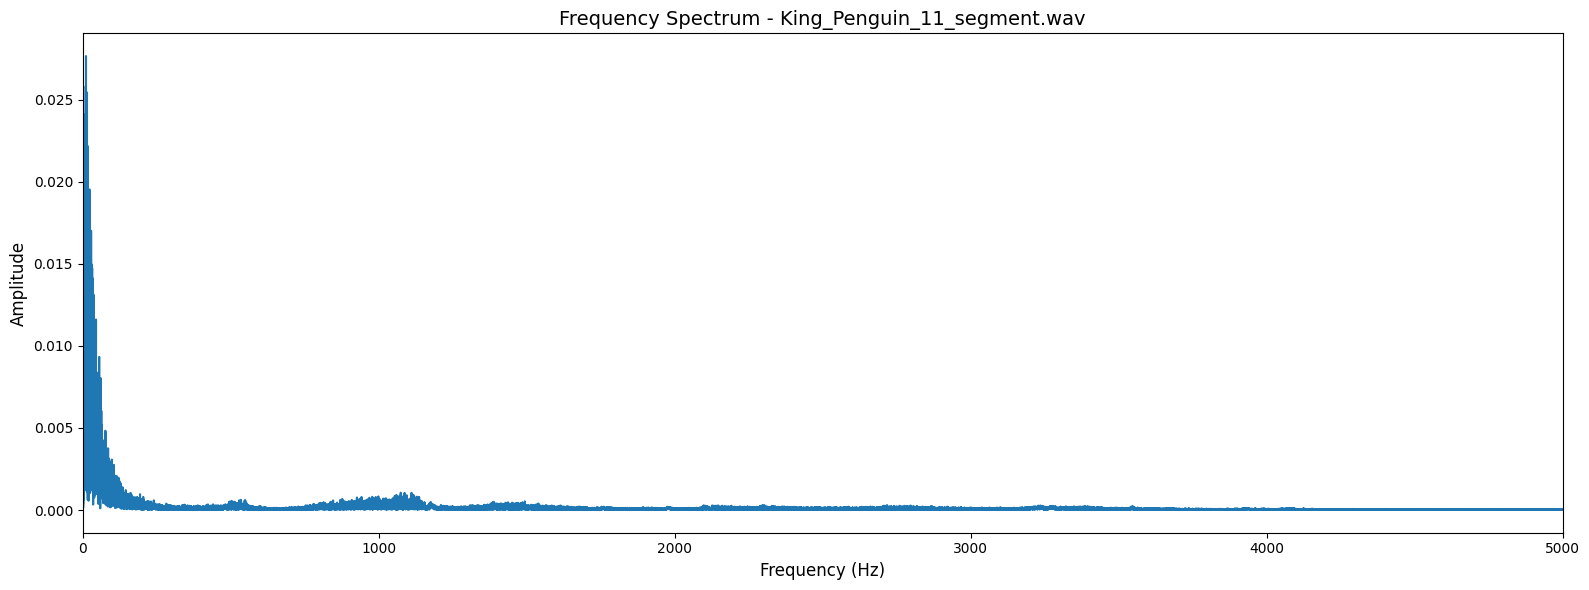


Processing directory: extracted_segments/Red-tailed Hawk_sounds_noise_reduced_segments
Visualizing segment for: Red-tailed_Hawk_10_segment.wav


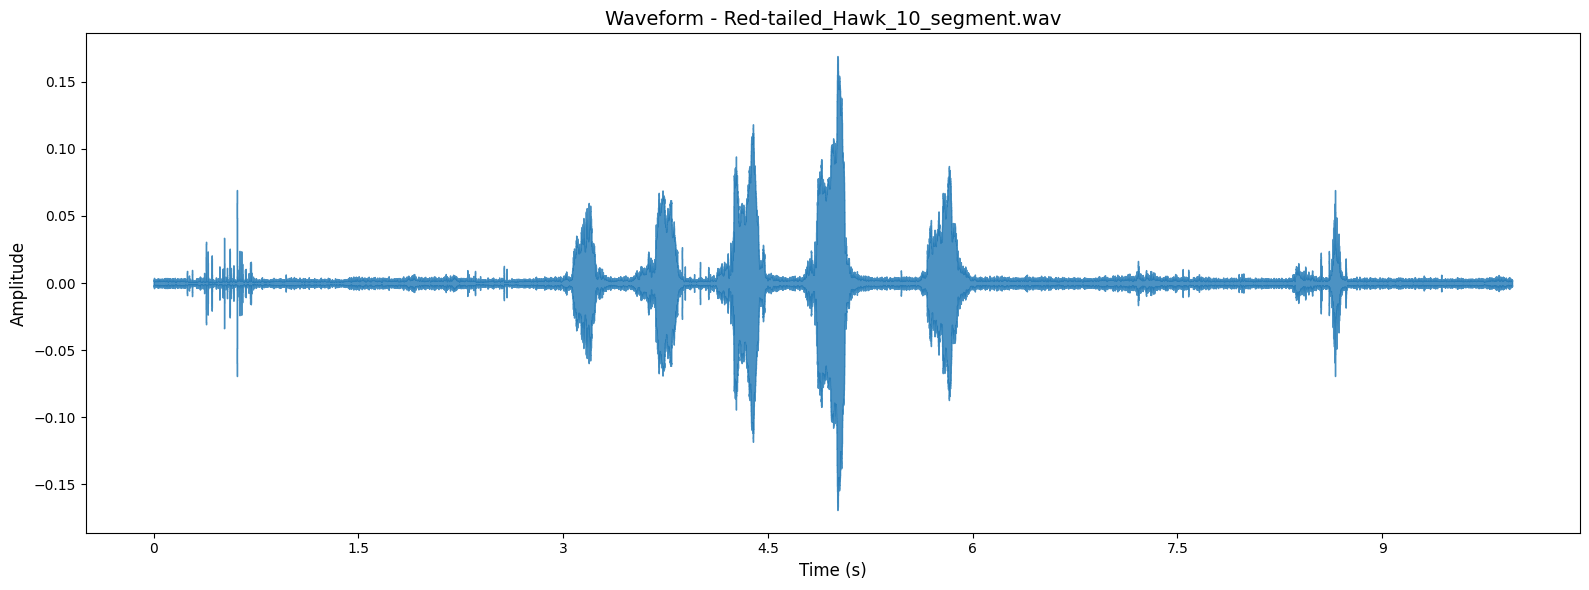

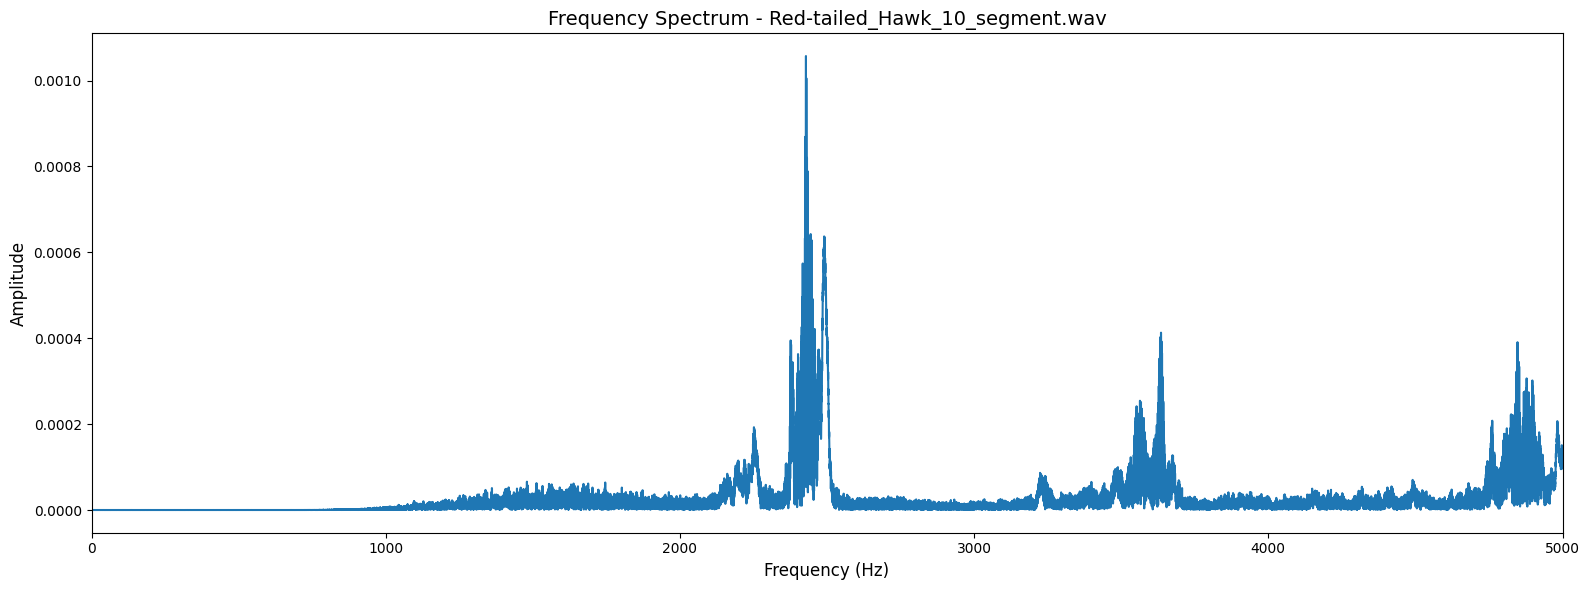

Visualizing segment for: Red-tailed_Hawk_11_segment.wav


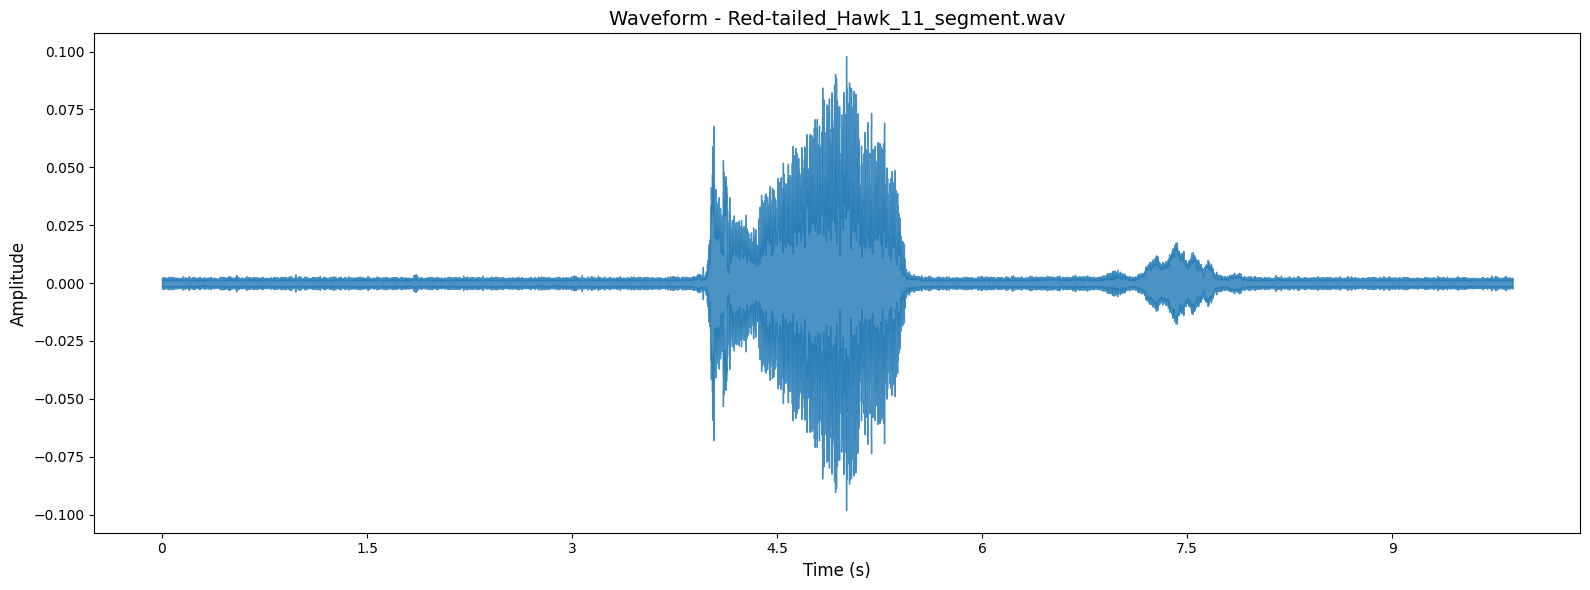

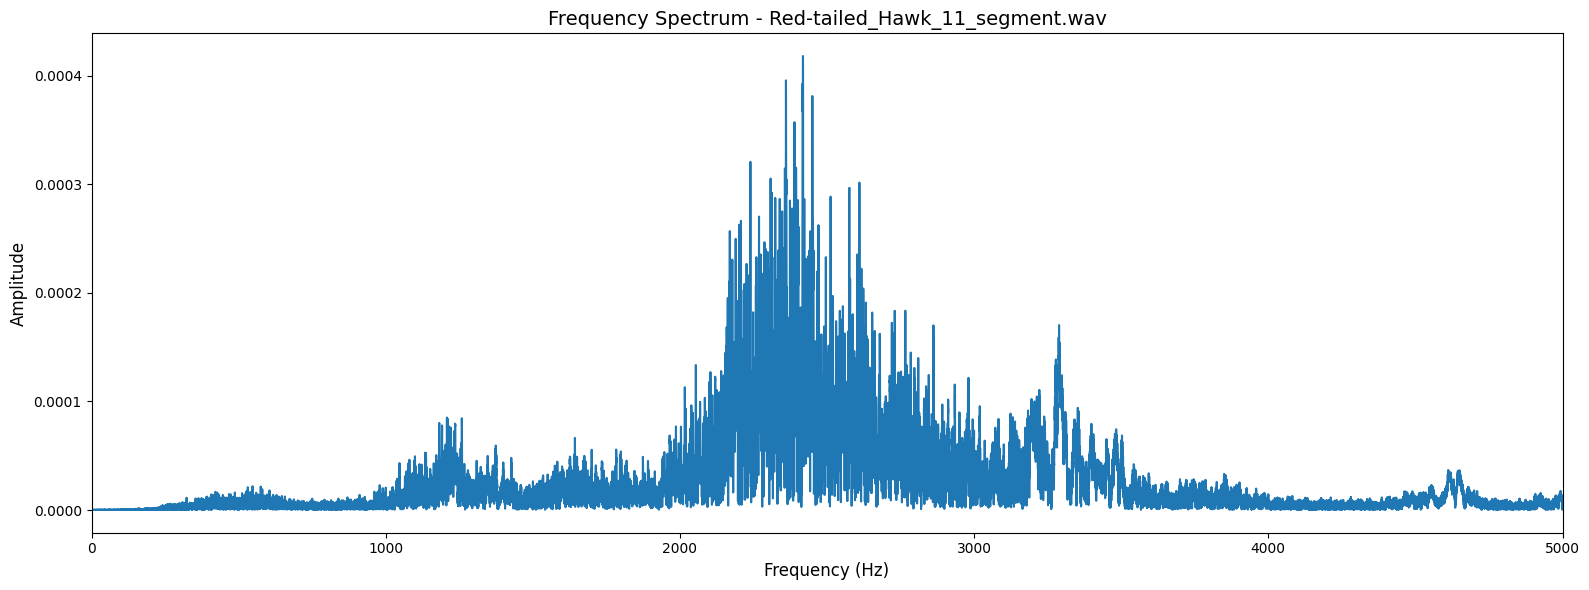


Processing directory: extracted_segments/Greater Prairie Chicken_sounds_noise_reduced_segments
Visualizing segment for: Greater_Prairie_Chicken_10_segment.wav


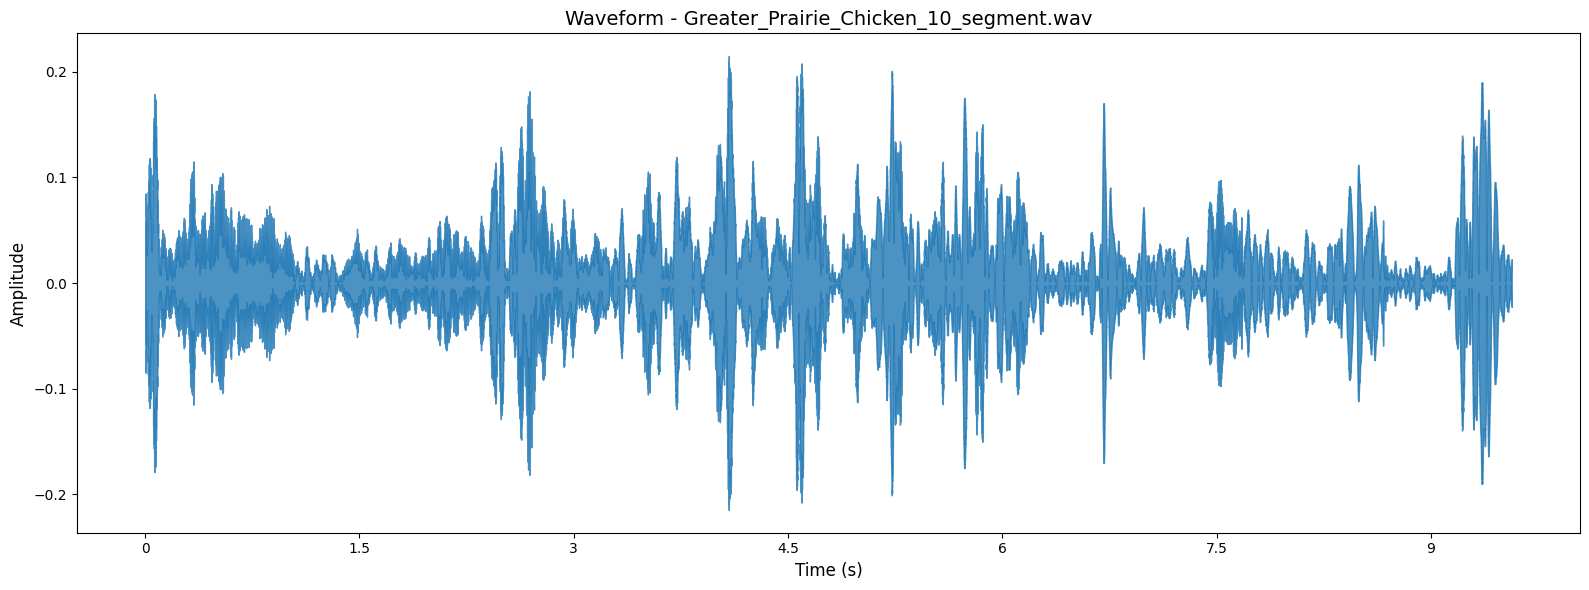

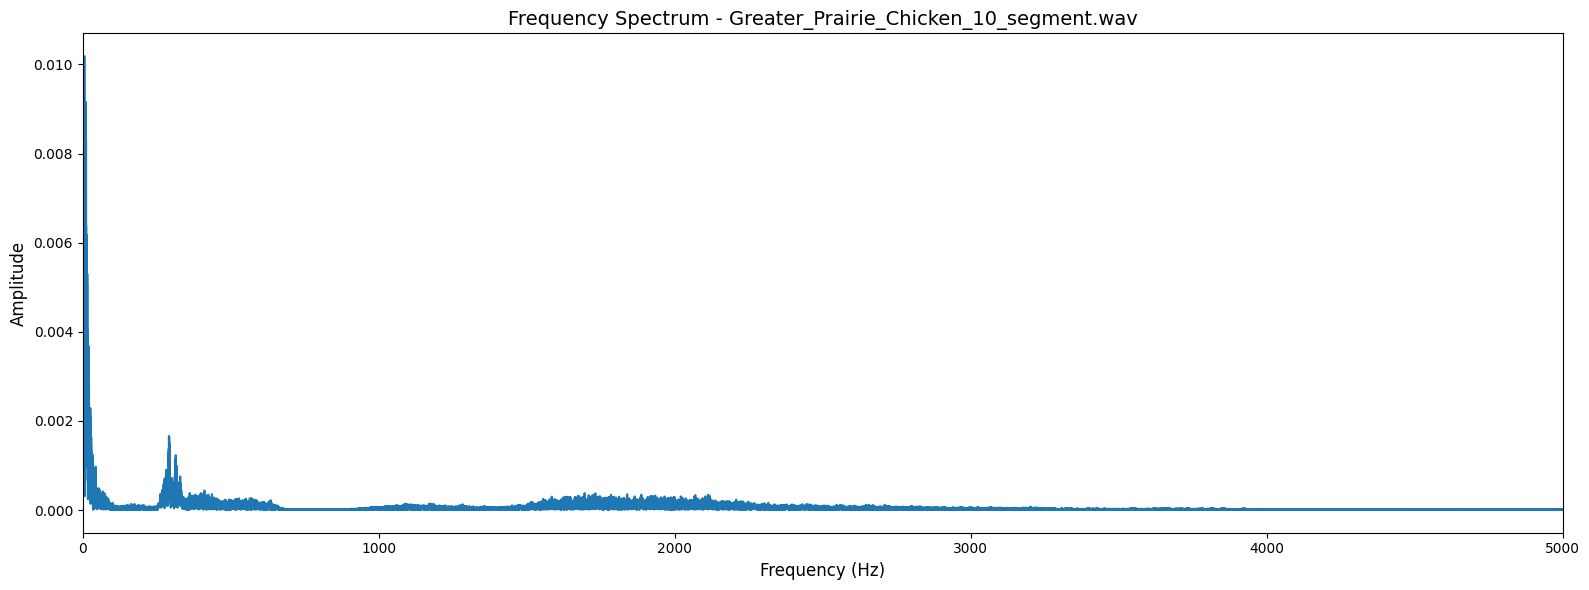

Visualizing segment for: Greater_Prairie_Chicken_11_segment.wav


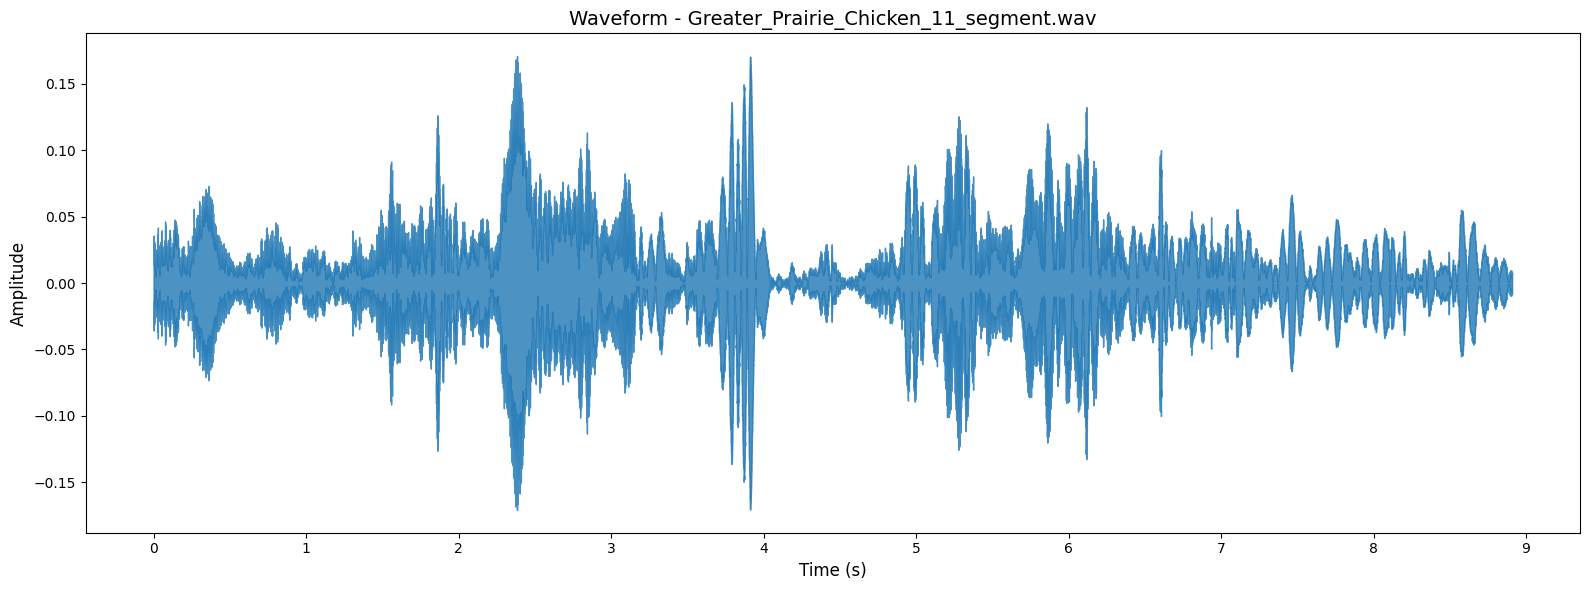

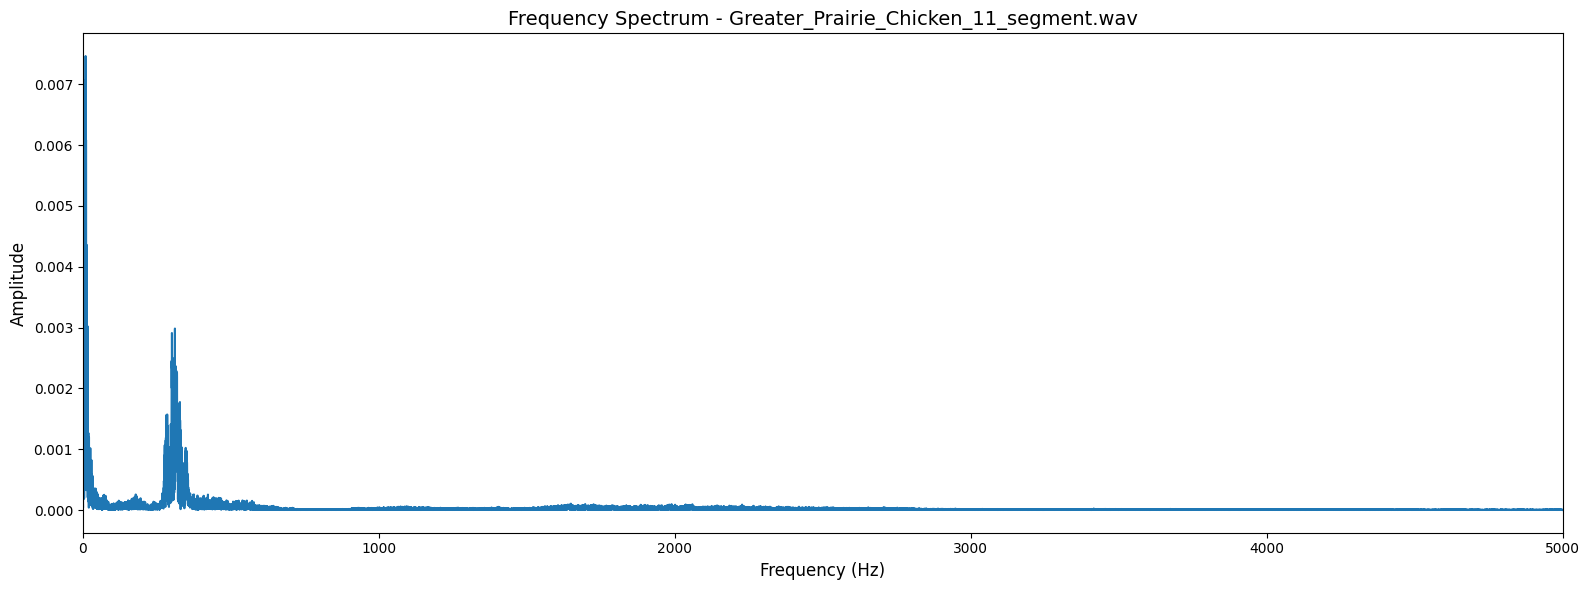


Processing directory: extracted_segments/Magpie Goose_sounds_noise_reduced_segments
Visualizing segment for: Magpie_Goose_10_segment.wav


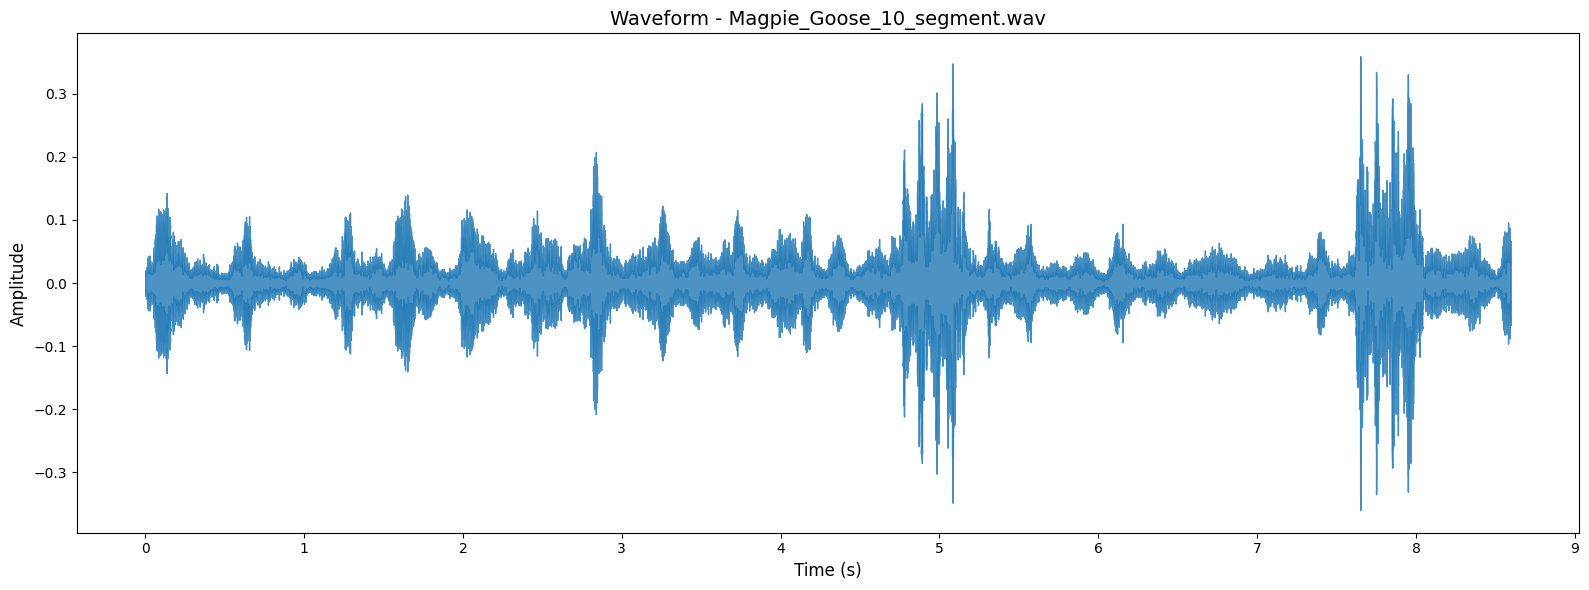

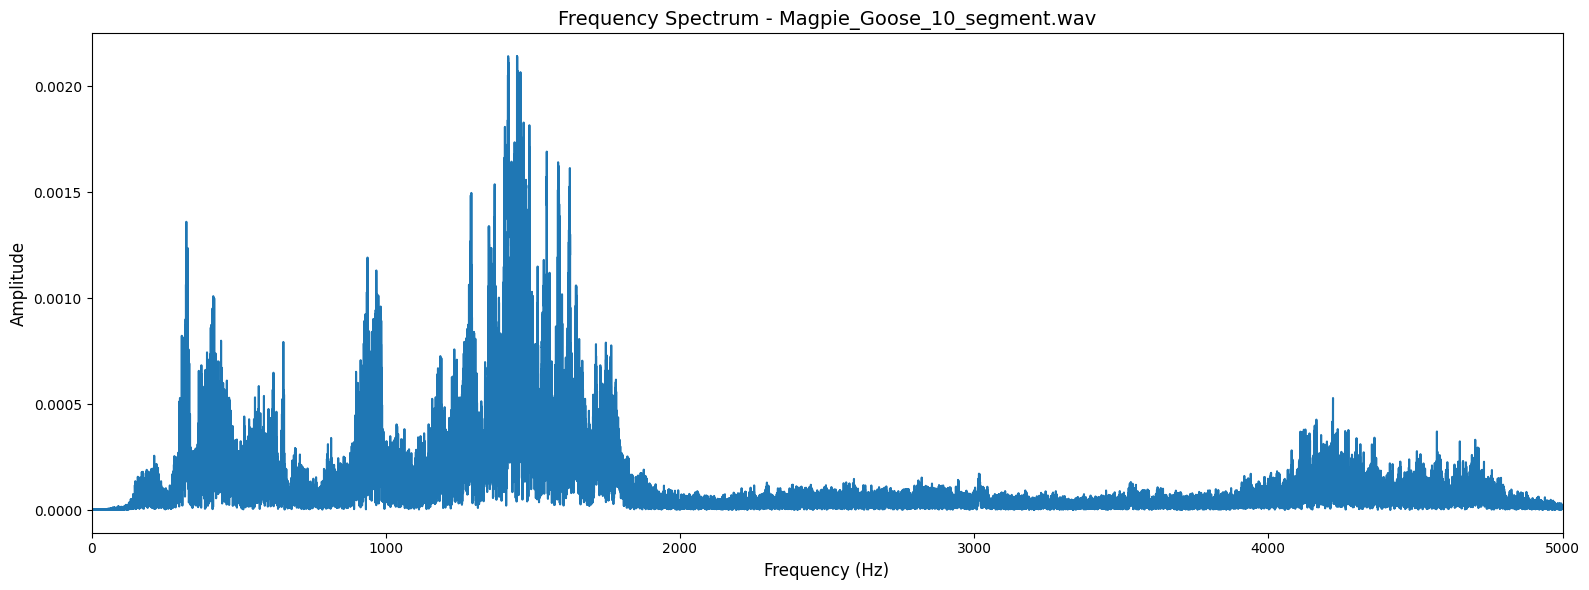

Visualizing segment for: Magpie_Goose_11_segment.wav


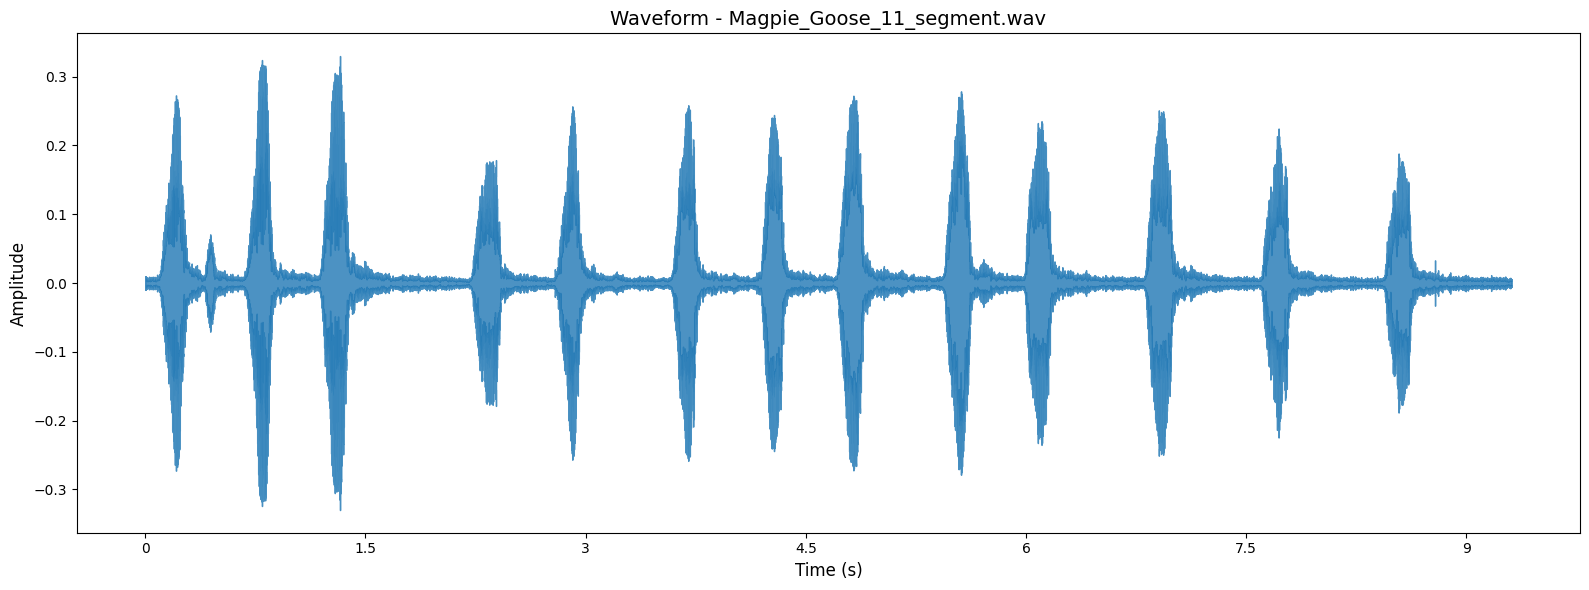

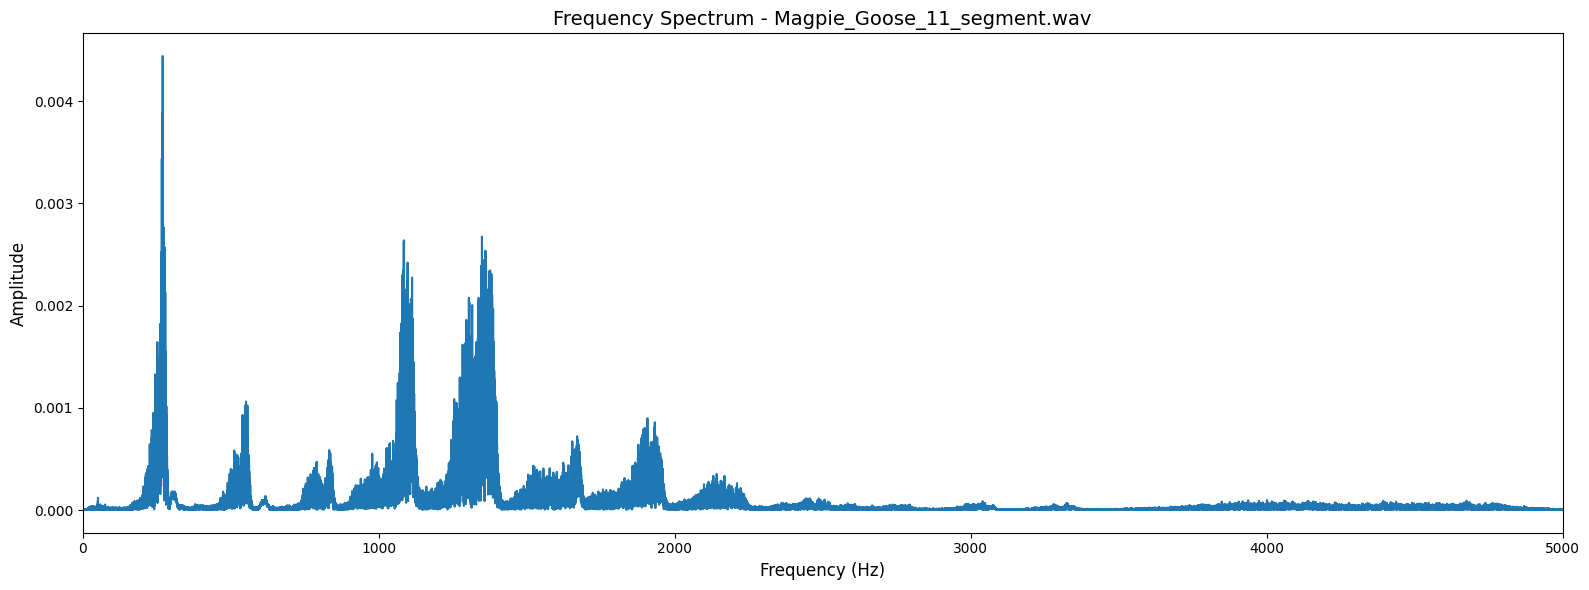

In [215]:


def visualize_segments(input_directories, segment_duration=5):
    for input_dir in input_directories:
        print(f"\nProcessing directory: {input_dir}")

        audio_files = [f for f in os.listdir(input_dir) if f.endswith(".wav")]  # Process WAV files instead

        if not audio_files:
            print(f"No audio files found in {input_dir}.")
            continue

        processed_files = 0

        for audio_file in audio_files:
            if processed_files >= 2:
                break

            input_path = os.path.join(input_dir, audio_file)

            try:
                y, sr = librosa.load(input_path, sr=None)

                energy_envelope = np.abs(y) ** 2
                cumulative_energy = np.cumsum(energy_envelope)
                cumulative_energy /= cumulative_energy[-1]

                temporal_centroid_index = np.where(cumulative_energy >= 0.5)[0][0]
                temporal_centroid_time = temporal_centroid_index / sr

                start_time = max(0, temporal_centroid_time - segment_duration)
                end_time = min(len(y) / sr, temporal_centroid_time + segment_duration)

                start_sample = int(start_time * sr)
                end_sample = int(end_time * sr)

                segment = y[start_sample:end_sample]

                print(f"Visualizing segment for: {audio_file}")

                # Plot waveform (Amplitude x Time)
                plt.figure(figsize=(16, 6))
                librosa.display.waveshow(segment, sr=sr, alpha=0.8)
                plt.title(f"Waveform - {audio_file}", fontsize=14)
                plt.xlabel("Time (s)", fontsize=12)
                plt.ylabel("Amplitude", fontsize=12)
                plt.tight_layout()
                plt.show()

                # Apply Fourier Transform and plot (Frequency x Amplitude)
                N = len(segment)
                T = 1.0 / sr
                yf = fft(segment)
                xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
                
                plt.figure(figsize=(16, 6))
                plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
                plt.xlim(0, 5000)  # Limit frequency range to 5000 Hz for better readability
                plt.title(f"Frequency Spectrum - {audio_file}", fontsize=14)
                plt.xlabel("Frequency (Hz)", fontsize=12)
                plt.ylabel("Amplitude", fontsize=12)
                plt.tight_layout()
                plt.show()

                processed_files += 1

            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

noise_reduced_directories = [
    "extracted_segments/penguin_sounds_noise_reduced_segments",
    "extracted_segments/Red-tailed Hawk_sounds_noise_reduced_segments",
    "extracted_segments/Greater Prairie Chicken_sounds_noise_reduced_segments",
    "extracted_segments/Magpie Goose_sounds_noise_reduced_segments"
]

visualize_segments(noise_reduced_directories)


### continuação graficos fourier

In [216]:

def visualize_segments(input_path, segment_duration=5):
    print(f"\nProcessing file: {input_path}")

    if not os.path.isfile(input_path):
        print(f"File does not exist: {input_path}")
        return

    try:
        y, sr = librosa.load(input_path, sr=None)

        energy_envelope = np.abs(y) ** 2
        cumulative_energy = np.cumsum(energy_envelope)
        cumulative_energy /= cumulative_energy[-1]

        temporal_centroid_index = np.where(cumulative_energy >= 0.5)[0][0]
        temporal_centroid_time = temporal_centroid_index / sr

        start_time = max(0, temporal_centroid_time - segment_duration)
        end_time = min(len(y) / sr, temporal_centroid_time + segment_duration)

        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)

        segment = y[start_sample:end_sample]

        print(f"Visualizing segment for: {os.path.basename(input_path)}")

        # Plot waveform (Amplitude x Time)
        plt.figure(figsize=(16, 6))
        librosa.display.waveshow(segment, sr=sr, alpha=0.8)
        plt.title(f"Waveform - {os.path.basename(input_path)}", fontsize=14)
        plt.xlabel("Time (s)", fontsize=12)
        plt.ylabel("Amplitude", fontsize=12)
        plt.tight_layout()
        plt.show()

        # Apply Fourier Transform and plot (Frequency x Amplitude)
        N = len(segment)
        T = 1.0 / sr
        yf = fft(segment)
        xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
        
        plt.figure(figsize=(16, 6))
        plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
        plt.xlim(0, 5000)  # Limit frequency range to 5000 Hz for better readability
        plt.title(f"Frequency Spectrum - {os.path.basename(input_path)}", fontsize=14)
        plt.xlabel("Frequency (Hz)", fontsize=12)
        plt.ylabel("Amplitude", fontsize=12)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {input_path}: {e}")

# Replace with the path to the file you want to process
input_path = "extracted_segments/Red Hawk_sounds_noise_reduced_segments/Semicollared_Hawk_1_segment.wav"
visualize_segments(input_path)



Processing file: extracted_segments/Red Hawk_sounds_noise_reduced_segments/Semicollared_Hawk_1_segment.wav
File does not exist: extracted_segments/Red Hawk_sounds_noise_reduced_segments/Semicollared_Hawk_1_segment.wav



Processing directory: extracted_segments/penguin_sounds_noise_reduced_segments
Filtered audio saved to: filtered_segments\penguin_sounds_noise_reduced_segments_filtered\King_Penguin_18_segment.wav


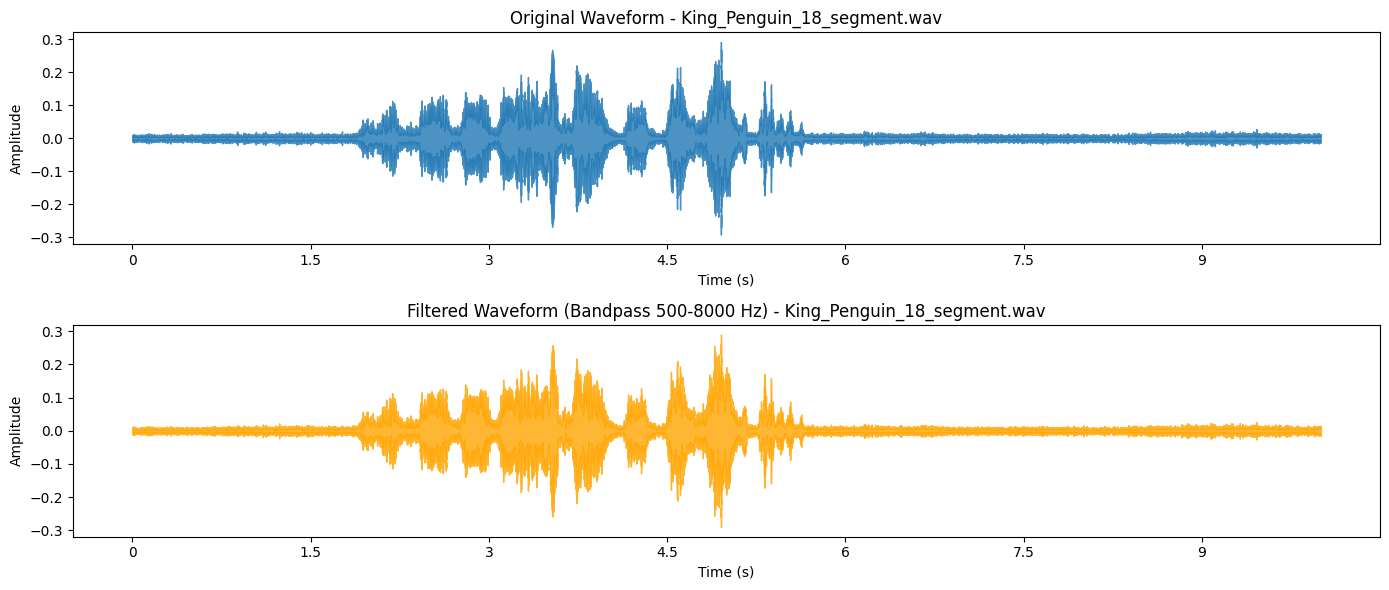

Filtered audio saved to: filtered_segments\penguin_sounds_noise_reduced_segments_filtered\King_Penguin_23_segment.wav


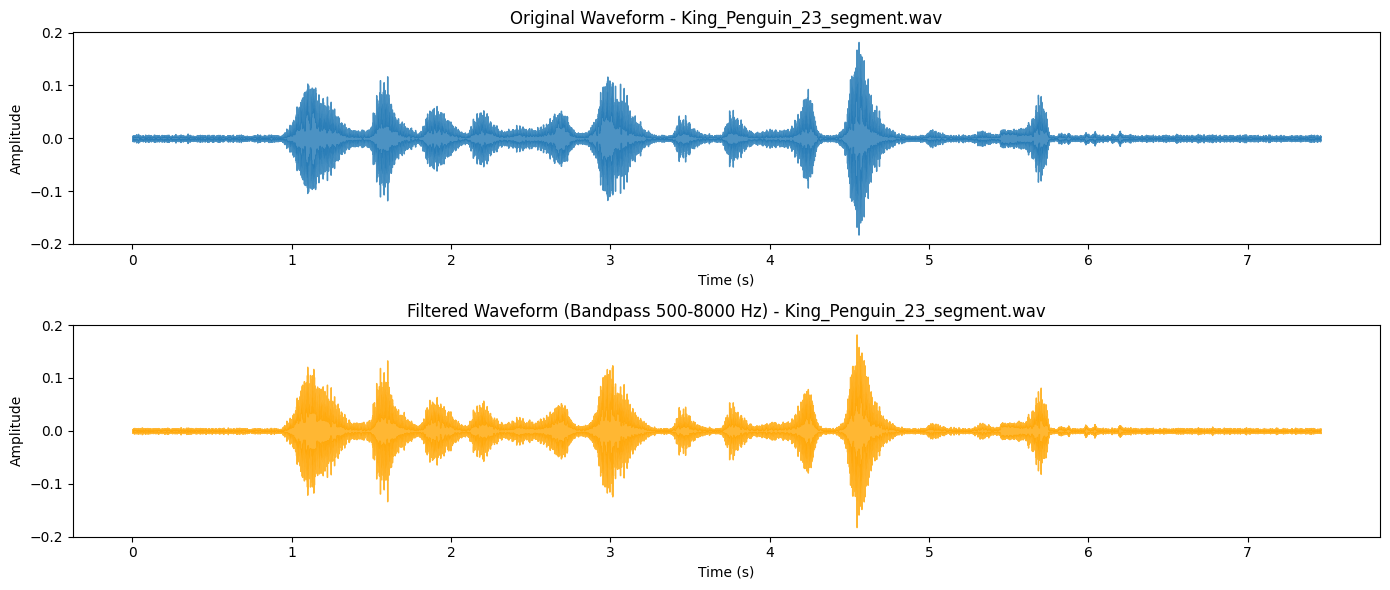


Processing directory: extracted_segments/Red-tailed Hawk_sounds_noise_reduced_segments
Filtered audio saved to: filtered_segments\Red-tailed Hawk_sounds_noise_reduced_segments_filtered\Red-tailed_Hawk_12_segment.wav


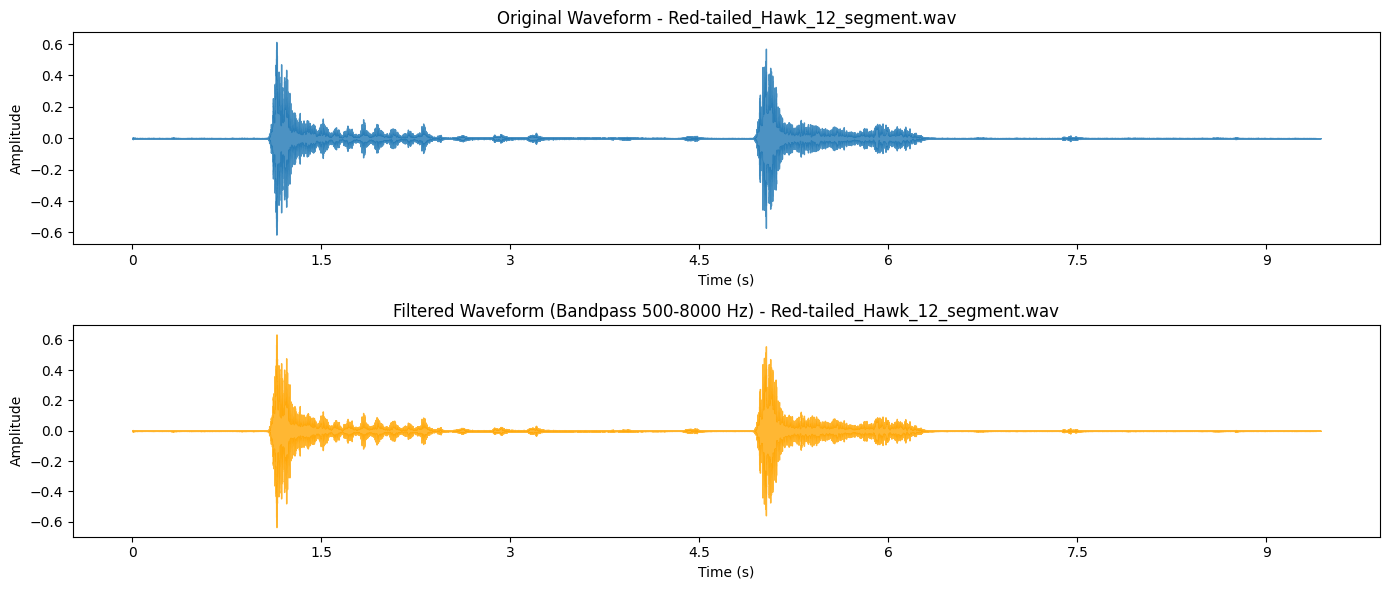

Filtered audio saved to: filtered_segments\Red-tailed Hawk_sounds_noise_reduced_segments_filtered\Red-tailed_Hawk_16_segment.wav


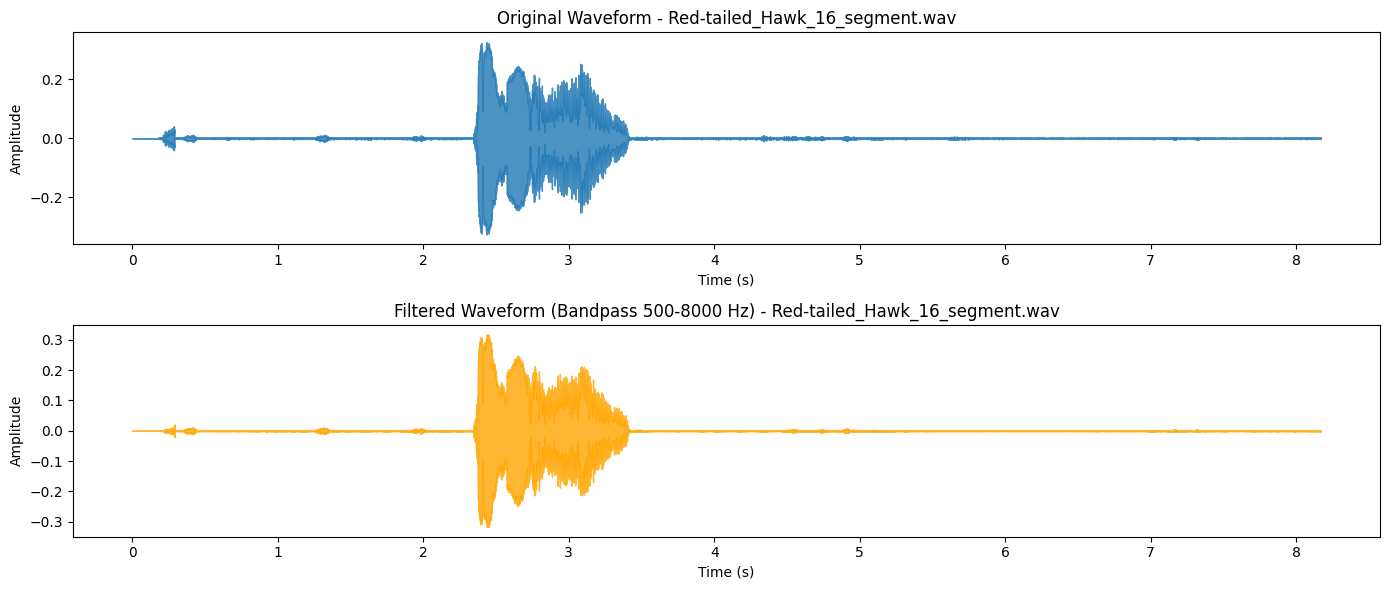


Processing directory: extracted_segments/Greater Prairie Chicken_sounds_noise_reduced_segments
Filtered audio saved to: filtered_segments\Greater Prairie Chicken_sounds_noise_reduced_segments_filtered\Greater_Prairie_Chicken_23_segment.wav


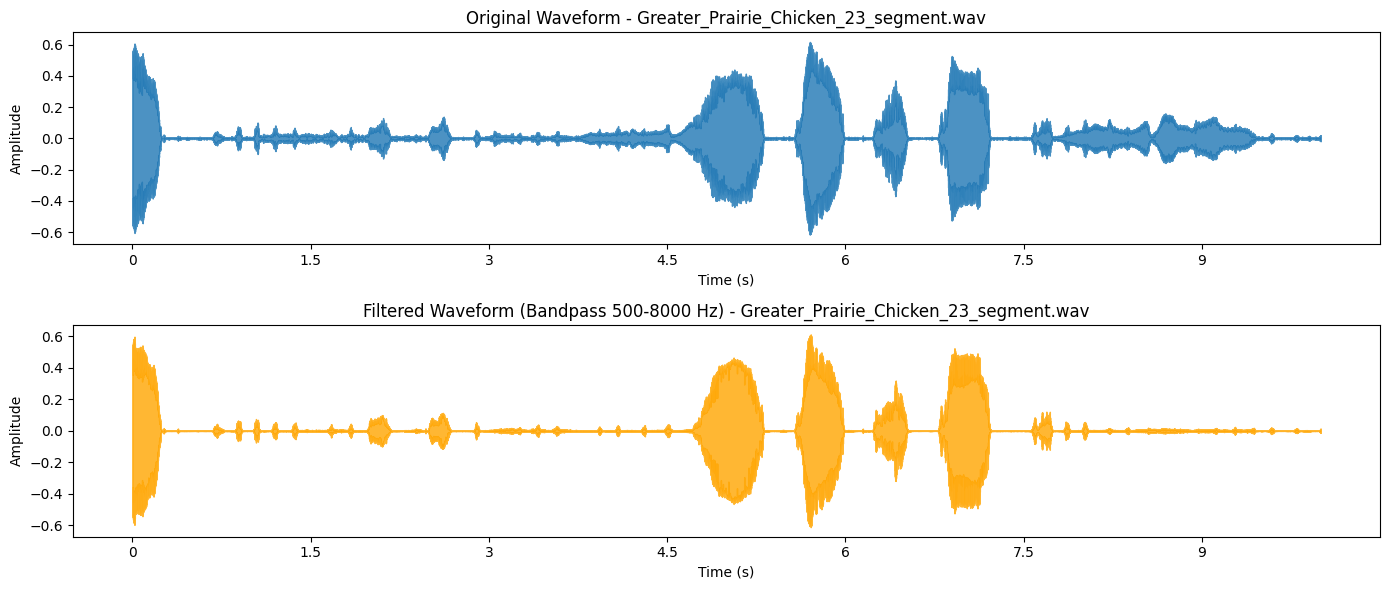

Filtered audio saved to: filtered_segments\Greater Prairie Chicken_sounds_noise_reduced_segments_filtered\Greater_Prairie_Chicken_2_segment.wav


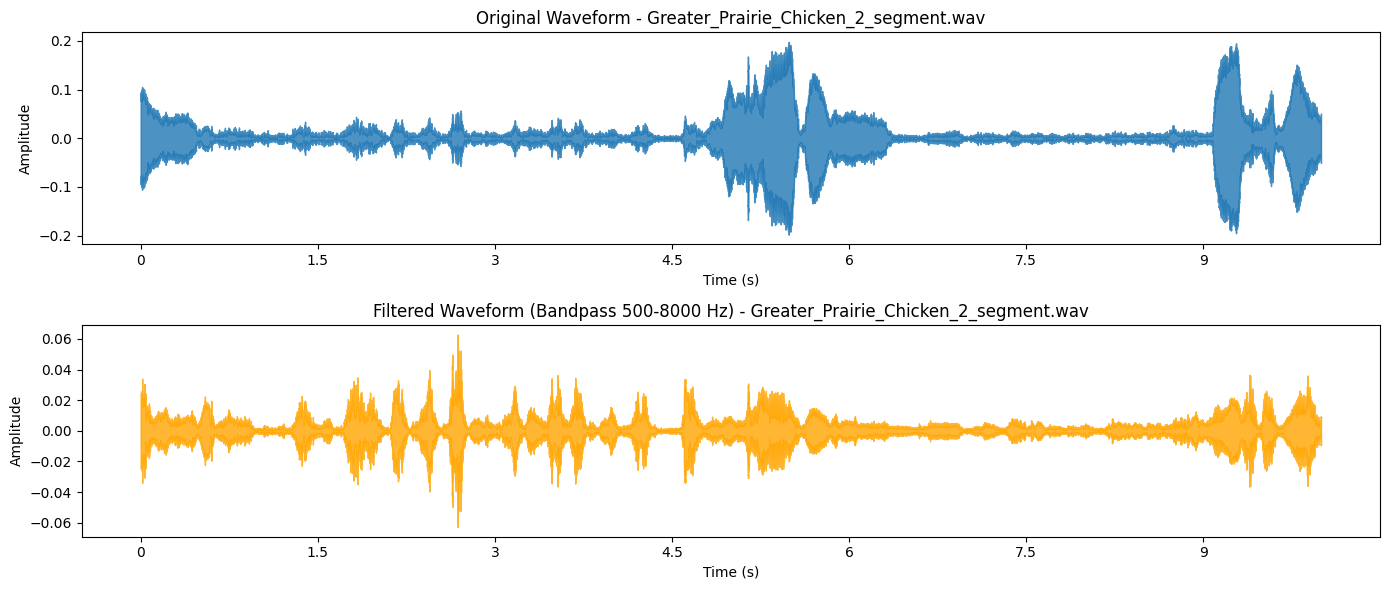


Processing directory: extracted_segments/Magpie Goose_sounds_noise_reduced_segments
Filtered audio saved to: filtered_segments\Magpie Goose_sounds_noise_reduced_segments_filtered\Magpie_Goose_13_segment.wav


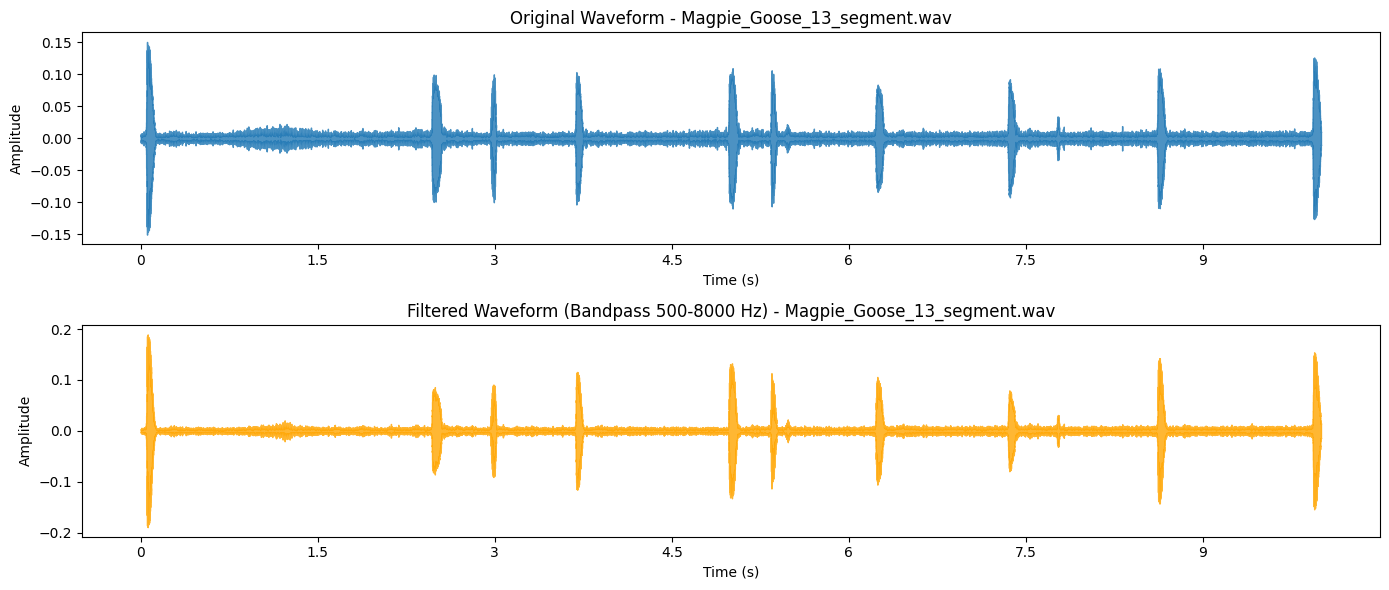

Filtered audio saved to: filtered_segments\Magpie Goose_sounds_noise_reduced_segments_filtered\Magpie_Goose_1_segment.wav


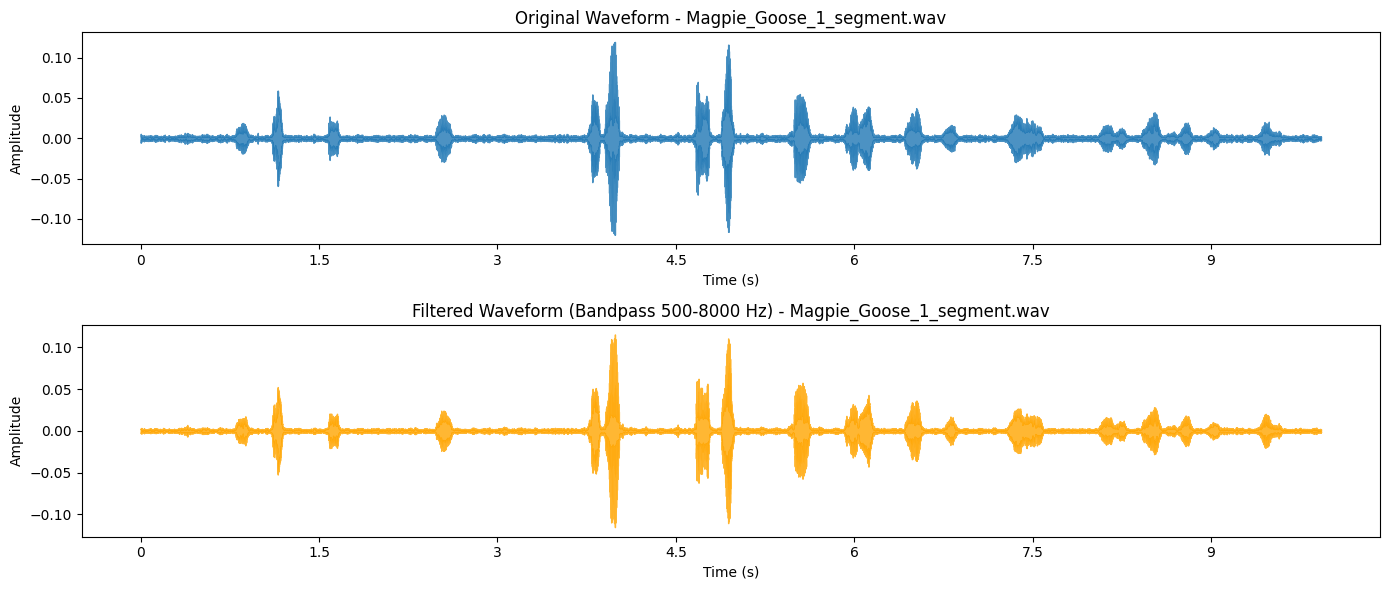

In [288]:

# Function to create a bandpass Butterworth filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a bandpass Butterworth filter.

    Args:
    - data (ndarray): Audio data to filter.
    - lowcut (float): Lower cutoff frequency in Hz.
    - highcut (float): Upper cutoff frequency in Hz.
    - fs (int): Sampling rate in Hz.
    - order (int): Order of the filter.

    Returns:
    - ndarray: Filtered audio data.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist  # Normalize lower cutoff frequency
    high = highcut / nyquist  # Normalize upper cutoff frequency
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Apply bandpass filter to specified segments and save them, while plotting only selected files
def apply_bandpass_filter_and_plot(input_directories, output_directory, lowcut=500, highcut=8000, files_to_process={}):
    """
    Apply a bandpass filter to specified audio segments, save all filtered files,
    and plot the original and filtered waveforms for specified files.

    Args:
    - input_directories (list): List of directories with audio segments.
    - output_directory (str): Directory to save the filtered audio segments.
    - lowcut (float): Lower cutoff frequency in Hz.
    - highcut (float): Upper cutoff frequency in Hz.
    - files_to_process (dict): Dictionary specifying files to plot (keys are species, values are lists of file names).
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for input_dir in input_directories:
        print(f"\nProcessing directory: {input_dir}")

        species_name = os.path.basename(input_dir)
        output_sub_dir = os.path.join(output_directory, species_name + "_filtered")
        os.makedirs(output_sub_dir, exist_ok=True)

        audio_files = [f for f in os.listdir(input_dir) if f.endswith(".wav")]

        if not audio_files:
            print(f"No audio files found in {input_dir}.")
            continue

        # Filter files based on user selection
        if species_name in files_to_process:
            audio_files = [f for f in audio_files if f in files_to_process[species_name]]

        for audio_file in audio_files:
            input_path = os.path.join(input_dir, audio_file)

            try:
                # Load the audio file
                y, sr = librosa.load(input_path, sr=None)

                # Apply the bandpass filter
                filtered_audio = butter_bandpass_filter(y, lowcut=lowcut, highcut=highcut, fs=sr)

                # Save the filtered segment
                output_path = os.path.join(output_sub_dir, audio_file)
                sf.write(output_path, filtered_audio, sr)
                print(f"Filtered audio saved to: {output_path}")

                # Plot only if the file is in files_to_process for the species
                if species_name in files_to_process and audio_file in files_to_process[species_name]:
                    # Plot original and filtered waveforms
                    plt.figure(figsize=(14, 6))
                    plt.subplot(2, 1, 1)
                    librosa.display.waveshow(y, sr=sr, alpha=0.8)
                    plt.title(f"Original Waveform - {audio_file}", fontsize=12)
                    plt.xlabel("Time (s)", fontsize=10)
                    plt.ylabel("Amplitude", fontsize=10)

                    plt.subplot(2, 1, 2)
                    librosa.display.waveshow(filtered_audio, sr=sr, alpha=0.8, color='orange')
                    plt.title(f"Filtered Waveform (Bandpass {lowcut}-{highcut} Hz) - {audio_file}", fontsize=12)
                    plt.xlabel("Time (s)", fontsize=10)
                    plt.ylabel("Amplitude", fontsize=10)

                    plt.tight_layout()
                    plt.show()

            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

# Directories of extracted segments
extracted_segments_directories = [
    "extracted_segments/penguin_sounds_noise_reduced_segments",
    "extracted_segments/Red-tailed Hawk_sounds_noise_reduced_segments",
    "extracted_segments/Greater Prairie Chicken_sounds_noise_reduced_segments",
    "extracted_segments/Magpie Goose_sounds_noise_reduced_segments"
]

# Output directory for filtered segments
filtered_segments_directory = "filtered_segments"

# Specify files to process for each species (for plotting)
files_to_process = {
    "penguin_sounds_noise_reduced_segments": ["King_Penguin_18_segment.wav", "King_Penguin_23_segment.wav"],
    "Red-tailed Hawk_sounds_noise_reduced_segments": ["Red-tailed_Hawk_12_segment.wav", "Red-tailed_Hawk_16_segment.wav"],
    "Greater Prairie Chicken_sounds_noise_reduced_segments": ["Greater_Prairie_Chicken_2_segment.wav", "Greater_Prairie_Chicken_23_segment.wav"],
    "Magpie Goose_sounds_noise_reduced_segments": ["Magpie_Goose_1_segment.wav", "Magpie_Goose_13_segment.wav"]
}

# Apply bandpass filter and save all filtered files while plotting only selected files
apply_bandpass_filter_and_plot(
    extracted_segments_directories, 
    filtered_segments_directory, 
    lowcut=500, 
    highcut=8000, 
    files_to_process=files_to_process
)


## grafico 3D fourier

In [234]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D

def get_fft_values(signal, T, N, f_s):
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    return xf, 2.0 / N * np.abs(yf[:N // 2])

def visualize_segments_3d(input_path, segment_duration=5):
    print(f"\nProcessing file: {input_path}")

    if not os.path.isfile(input_path):
        print(f"File does not exist: {input_path}")
        return

    try:
        y, sr = librosa.load(input_path, sr=None)

        energy_envelope = np.abs(y) ** 2
        cumulative_energy = np.cumsum(energy_envelope)
        cumulative_energy /= cumulative_energy[-1]

        temporal_centroid_index = np.where(cumulative_energy >= 0.5)[0][0]
        temporal_centroid_time = temporal_centroid_index / sr

        start_time = max(0, temporal_centroid_time - segment_duration)
        end_time = min(len(y) / sr, temporal_centroid_time + segment_duration)

        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)

        segment = y[start_sample:end_sample]

        T = 1.0 / sr  # Sampling interval
        N = len(segment)
        f_s = sr  # Sampling frequency

        # FFT values
        f_values, fft_values = get_fft_values(segment, T, N, f_s)
        times = np.linspace(start_time, end_time, len(segment))

        # Reduce data points to avoid memory issues
        downsample_factor = max(1, len(segment) // 500)  # Reduce to ~500 points max
        segment = segment[::downsample_factor]
        times = times[::downsample_factor]
        fft_values = fft_values[:len(f_values) // 2]  # Take half for positive frequencies
        f_values = f_values[:len(f_values) // 2]

        # 3D Plot setup
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel("\nTime [s]", fontsize=14)
        ax.set_ylabel("\nFrequency [Hz]", fontsize=14)
        ax.set_zlabel("\nAmplitude", fontsize=14)

        # Plot waveform as black line
        ax.plot(times, [0] * len(times), segment, linewidth=2, color='black', label="Waveform")

        # Highlight FFT as red overlay
        fft_x = [times[-1]] * len(f_values)
        fft_y = f_values
        fft_z = fft_values * 3
        ax.plot(fft_x, fft_y, fft_z, linewidth=2, color='red', label="FFT")

        plt.tight_layout()
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error processing {input_path}: {e}")

# Replace with the path to the file you want to process
input_path = "extracted_segments/chicken_sounds_noise_reduced_segments/Greater_Prairie_Chicken_1_segment.wav"
visualize_segments_3d(input_path)




Processing file: extracted_segments/chicken_sounds_noise_reduced_segments/Greater_Prairie_Chicken_1_segment.wav
File does not exist: extracted_segments/chicken_sounds_noise_reduced_segments/Greater_Prairie_Chicken_1_segment.wav


# Feature Selection

This is the part of feature extraction where we check for different features in the audio file. Currently there are the spectral features, chroma shift, zero crossing rate, rms and MFCCS, but we should not use all of them and maybe look at other options

## Codigo adaptado do de cima pelo GPT

In [250]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
from tqdm import tqdm

def extract_features(file_path, sr=22050):
    """
    Extrai as principais características de um arquivo de áudio.

    Args:
        file_path (str): Caminho para o arquivo de áudio.
        sr (int): Taxa de amostragem padrão (default: 22050 Hz).

    Returns:
        dict: Dicionário contendo as características extraídas.
    """
    # Carregar o áudio
    y, sr = librosa.load(file_path, sr=sr)
    
    # Remover silêncios
    y, _ = librosa.effects.trim(y)

    # Extração de *features* no domínio do tempo e da frequência
    features = {}
    features['File'] = os.path.basename(file_path)
    features['Zero_Crossing_Rate'] = librosa.feature.zero_crossing_rate(y).mean()
    features['RMS_Energy'] = librosa.feature.rms(y=y).mean()
    features['Spectral_Centroid'] = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    features['Spectral_Bandwidth'] = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    features['Spectral_Rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).mean()
    #features['Spectral_Flatness'] = librosa.feature.spectral_flatness(y=y).mean()
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i, mfcc in enumerate(mfccs):
        features[f'MFCC_{i+1}_mean'] = mfcc.mean()  # Mean of each coefficient
        features[f'MFCC_{i+1}_std'] = mfcc.std()    # Standard deviation of each coefficient        
    #features['Chroma_STFT'] = librosa.feature.chroma_stft(y=y, sr=sr).mean()

    #Spectral Contrast (em lista)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    for i, contrast in enumerate(spectral_contrast):
        features[f"Spectral_Contrast_{i+1}"] = contrast.mean()
    
    return features

def compute_features_from_directory(input_directory, sr=22050):
    """
    Extrai características de todos os arquivos .wav em um diretório.

    Args:
        input_directory (str): Diretório contendo os arquivos de áudio.
        sr (int): Taxa de amostragem padrão (default: 22050 Hz).

    Returns:
        pd.DataFrame: DataFrame contendo as características extraídas.
    """
    features_list = []

    # Caminhar pelos arquivos no diretório
    for root, _, files in os.walk(input_directory):
        for file in tqdm(files, desc=f"Processando arquivos em {root}"):
            if file.endswith(".wav"):
                try:
                    file_path = os.path.join(root, file)
                    features = extract_features(file_path, sr=sr)
                    
                    # Extrair o nome da espécie (baseado no nome do diretório)
                    species = os.path.basename(root).replace("_sounds_noise_reduced_segments", "")
                    features['Species'] = species
                    
                    features_list.append(features)
                except Exception as e:
                    print(f"Erro ao processar {file}: {e}")
    
    # Converter lista de características para DataFrame
    features_df = pd.DataFrame(features_list)
    return features_df

# Caminho do diretório com áudios segmentados
segmented_audio_directory = "filtered_segments"

# Extrair características
features_df = compute_features_from_directory(segmented_audio_directory)

# Salvar as características em CSV para futuras análises
features_df.to_csv("audio_features_updated.csv", index=False)

# Exibir as primeiras linhas do DataFrame
print(features_df.head())

Processando arquivos em filtered_segments: 0it [00:00, ?it/s]
Processando arquivos em filtered_segments\Greater Prairie Chicken_sounds_noise_reduced_segments_filtered: 100%|██████████| 28/28 [00:02<00:00,  9.55it/s]
Processando arquivos em filtered_segments\Magpie Goose_sounds_noise_reduced_segments_filtered: 100%|██████████| 27/27 [00:02<00:00, 12.00it/s]
Processando arquivos em filtered_segments\penguin_sounds_noise_reduced_segments_filtered: 100%|██████████| 30/30 [00:02<00:00, 11.12it/s]
Processando arquivos em filtered_segments\Red-tailed Hawk_sounds_noise_reduced_segments_filtered: 100%|██████████| 28/28 [00:02<00:00, 10.97it/s]

                                     File  Zero_Crossing_Rate  RMS_Energy  \
0  Greater_Prairie_Chicken_10_segment.wav            0.256043    0.004601   
1  Greater_Prairie_Chicken_11_segment.wav            0.212410    0.001562   
2  Greater_Prairie_Chicken_12_segment.wav            0.199644    0.001307   
3  Greater_Prairie_Chicken_13_segment.wav            0.181474    0.029979   
4  Greater_Prairie_Chicken_14_segment.wav            0.100823    0.001488   

   Spectral_Centroid  Spectral_Bandwidth  Spectral_Rolloff  MFCC_1_mean  \
0        3186.544942         1900.229812       5041.817154  -657.880554   
1        2863.890519         1814.929219       4593.816615  -673.656860   
2        2612.504832         1639.249185       4093.107191  -697.912537   
3        2415.713928         1382.148857       3301.574622  -409.434967   
4        1429.832881         1125.725655       2042.506752  -627.245361   

   MFCC_1_std  MFCC_2_mean  MFCC_2_std  ...  MFCC_13_mean  MFCC_13_std  \
0  143.05114

# K-means para o csv updated e para o normal

## os csvs dão valores diferentes

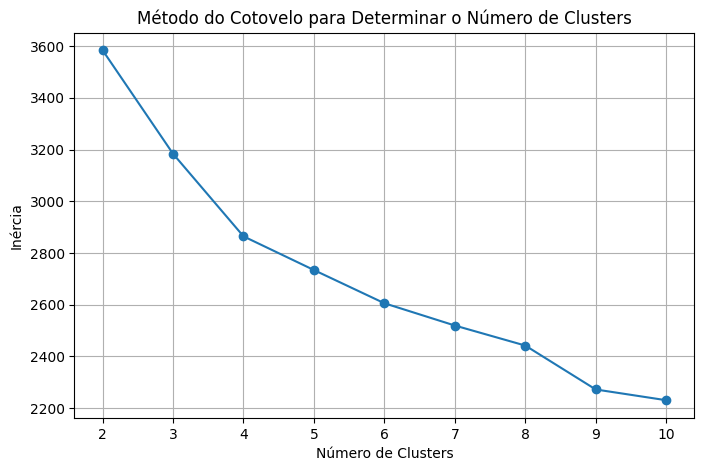

Silhouette Score para 4 clusters: 0.16


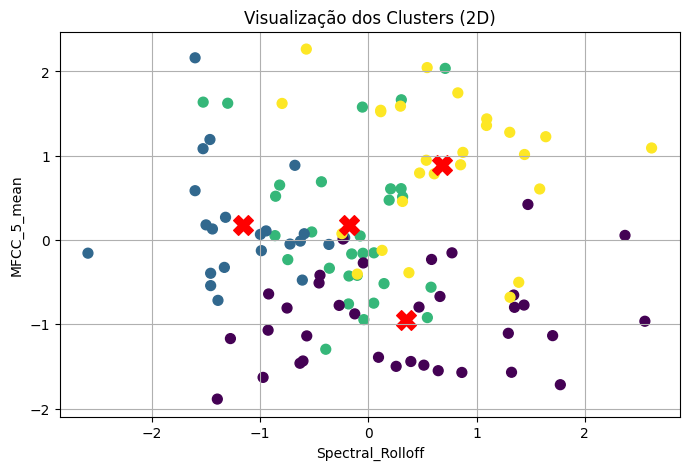

In [292]:


# Carregar o dataset
file_path = 'audio_features_updated.csv'
bird_data = pd.read_csv(file_path)

# Selecionar apenas as colunas numéricas para clustering (excluir 'File', 'Species', 'MFCCs')
features = bird_data.drop(columns=['File', 'Species'])

# Padronizar as características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar o número ótimo de clusters (Método do Cotovelo)
inertia = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid()
plt.show()

# Escolher o número de clusters (defina manualmente com base no gráfico)
optimal_clusters = 4  # Substitua pelo número ideal de clusters identificado

# Aplicar o K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Adicionar os rótulos de cluster ao dataset original
bird_data['Cluster'] = cluster_labels

# Avaliar o agrupamento com a métrica de Silhouette
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Silhouette Score para {optimal_clusters} clusters: {silhouette_avg:.2f}")

# Visualizar os clusters (usando duas primeiras dimensões para simplicidade)
plt.figure(figsize=(8, 5))
plt.scatter(features_scaled[:, 4], features_scaled[:,13], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 13], color='red', marker='X', s=200) #11,13,17,23,27
plt.title('Cluster Visualization (2D)')
plt.xlabel(f'{features.columns[4]}')
plt.ylabel(f'{features.columns[13]}')
plt.grid()
plt.show()

In [293]:
# Count the number of instances for each species in each cluster
species_cluster_distribution = bird_data.groupby(['Cluster', 'Species']).size().unstack(fill_value=0)

# Display the species distribution in each cluster
print("Species distribution in each cluster:")
print(species_cluster_distribution)

# Analyze the correctness of cluster assignments
# Assuming the correct species is the one with the highest count in each cluster
correct_assignments = {}
incorrect_assignments = {}

for cluster_id, cluster_data in species_cluster_distribution.iterrows():
    # Identify the species with the most instances in the cluster
    dominant_species = cluster_data.idxmax()
    dominant_count = cluster_data.max()
    total_count = cluster_data.sum()

    correct_assignments[cluster_id] = {
        'Dominant_Species': dominant_species,
        'Correct_Count': dominant_count,
        'Accuracy': dominant_count / total_count
    }

    # Instances not belonging to the dominant species are considered incorrect
    incorrect_assignments[cluster_id] = total_count - dominant_count

# Display results for each cluster
print("\nCluster Evaluation Results:")
for cluster_id, results in correct_assignments.items():
    print(f"Cluster {cluster_id}:")
    print(f"  Dominant Species: {results['Dominant_Species']}")
    print(f"  Correct Assignments: {results['Correct_Count']}")
    print(f"  Accuracy: {results['Accuracy']:.2%}")
    print(f"  Incorrect Assignments: {incorrect_assignments[cluster_id]}")


Species distribution in each cluster:
Species  Greater Prairie Chicken_filtered  Magpie Goose_filtered  \
Cluster                                                            
0                                       4                     21   
1                                       1                      2   
2                                      23                      1   
3                                       0                      3   

Species  Red-tailed Hawk_filtered  penguin_filtered  
Cluster                                              
0                               3                 7  
1                               0                19  
2                               1                 4  
3                              24                 0  

Cluster Evaluation Results:
Cluster 0:
  Dominant Species: Magpie Goose_filtered
  Correct Assignments: 21
  Accuracy: 60.00%
  Incorrect Assignments: 14
Cluster 1:
  Dominant Species: penguin_filtered
  Correct Assignments: 19
